# Introduction 

1. **Notebook Description** In this notebook, I conduct exploratory data analysis (EDA) on the asset and universe datasets.
2. **Author** Filippo Radice Fossati
3. **Date** 09/22/2023

# Notebook Structure 

This notebook is structured as follows:

1. **Section 1**: Importing necessary libraries and datasets.
2. **Section 2**: EDA on Asset
3. **Section 3**: EDA on Universe



# Section 1 - Import Libraries & Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import seaborn as sns
import matplotlib.pyplot as plt


import rasterio
import osmnx as ox
import geopandas as gpd

import support_function as sf

%load_ext autoreload
%autoreload 2
#to suppress scientifc notation
pd.set_option('display.float_format', '{:.3f}'.format)

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (6, 6), 'axes.edgecolor': '0.2'})

In [2]:
#loading dataset
universe = pd.read_csv('./_data/Company_Universe_Data_v1.csv')
universe = universe.iloc[:,:20].copy()
#renaming columns
universe.columns = universe.columns.map(lambda x: '_'.join(x.split(' ')).lower())
universe.head(1)

tcuid  year companyname          isin countrycode   countryname  gicscode  \
0  42696  2021   Amcor plc  JE00BJ1F3079          CH  SWITZERLAND   15103020   

                                         gicsname gicssectorname  \
0  Paper & Plastic Packaging Products & Materials      Materials   

  gicsindustrygroupname        gicsindustryname tc464_primarysectorreference  \
0             Materials  Containers & Packaging                       32222A   

                             tc464_primarysectorname  tctotalrevenue  \
0  Coated and laminated paper, packaging paper an...       12861.000   

   tcebitda   tcebit  tcabswaterdirectcooling  tcabswaterdirectprocess  \
0  2002.000 1438.000                    0.000              1298900.000   

   tcabswaterpurchased  tcabswaterdirectandpurchased  
0                0.000                   1298900.000

In [3]:
asset = gpd.read_file('./_data/Asset_Data_v1.csv')
#renaming columns
asset.columns = asset.columns.map(lambda x: '_'.join(x.split(' ')).lower())
asset.sample(1)

data_source  key_id asset_id asset_name  \
174  S&P Global World Electric Power Plants  261768  1052543   HUANCHAY   

    asset_id_type  year country    latitude  longitude facility_category  ...  \
174       WEPP ID  2021    Peru  -11.998654  -76.92642      Power Plants  ...   

    ultimate_parent_mi_key ultimate_parent_ciq_id ultimate_parent_isin  \
174                4113732                 704674         JE00B4T3BW64   

    trucost_uid ultimate_parent_uid                  gics_sector category  \
174       84097              123592  Diversified Metals & Mining    Asset   

    geometry_epsg_8857 geometry_epsg_4326 geometry  
174      POLYGON EMPTY      POLYGON EMPTY     None  

[1 rows x 26 columns]

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.sample(1)

/var/folders/kz/gkm958296f79lgmty6dfw0xc0000gn/T/ipykernel_45294/548486985.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est continent      name iso_a3  gdp_md_est  \
57 25876380.000    Africa  Cameroon    CMR       39007   

                                             geometry  
57  POLYGON ((14.49579 12.85940, 14.89336 12.21905...

# Section 2 - Asset EDA

## 2.1 - General Information

**Asset Dataset** This is a list of assets owned or operated by 3 the following mining companies:i)BHP Group; ii) Freeport-McMoRan Inc.;iii)Glencore plc. 


In [5]:
#renaming columns
asset.columns = asset.columns.map(lambda x: '_'.join(x.split(' ')).lower())
asset.columns

Index(['data_source', 'key_id', 'asset_id', 'asset_name', 'asset_id_type',
       'year', 'country', 'latitude', 'longitude', 'facility_category',
       'activity_description', 'owner_name', 'owner_mi_key', 'owner_ciq_id',
       'owner_isin', 'ultimate_parent_name', 'ultimate_parent_mi_key',
       'ultimate_parent_ciq_id', 'ultimate_parent_isin', 'trucost_uid',
       'ultimate_parent_uid', 'gics_sector', 'category', 'geometry_epsg_8857',
       'geometry_epsg_4326', 'geometry'],
      dtype='object')

In [6]:
#Checking General Info Of teh Dataset
asset.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   data_source             807 non-null    object  
 1   key_id                  807 non-null    object  
 2   asset_id                807 non-null    object  
 3   asset_name              807 non-null    object  
 4   asset_id_type           807 non-null    object  
 5   year                    807 non-null    object  
 6   country                 807 non-null    object  
 7   latitude                807 non-null    object  
 8   longitude               807 non-null    object  
 9   facility_category       807 non-null    object  
 10  activity_description    807 non-null    object  
 11  owner_name              807 non-null    object  
 12  owner_mi_key            807 non-null    object  
 13  owner_ciq_id            807 non-null    object  
 14  owner_isin        

In [7]:
#Checking Null Values
asset.isnull().mean()

data_source              0.000
key_id                   0.000
asset_id                 0.000
asset_name               0.000
asset_id_type            0.000
year                     0.000
country                  0.000
latitude                 0.000
longitude                0.000
facility_category        0.000
activity_description     0.000
owner_name               0.000
owner_mi_key             0.000
owner_ciq_id             0.000
owner_isin               0.000
ultimate_parent_name     0.000
ultimate_parent_mi_key   0.000
ultimate_parent_ciq_id   0.000
ultimate_parent_isin     0.000
trucost_uid              0.000
ultimate_parent_uid      0.000
gics_sector              0.000
category                 0.000
geometry_epsg_8857       0.000
geometry_epsg_4326       0.000
geometry                 1.000
dtype: float64

In [8]:
#checking unique values of all columns
asset['data_source'].unique()

array(['EU NPRI', 'IHS Refining and Chemicals',
       'S&P Market Intelligence Company Headquarters',
       'S&P Market Intelligence Office Locations',
       'IHS Exploration and Production',
       'S&P Market Intelligence Metals and Mining Properties',
       'Australian NPRI', 'S&P Market Intelligence Power Plants',
       'Canadian NPRI', 'S&P Global World Electric Power Plants',
       'IHS Power and Clean Energy', 'S&P Market Intelligence Coal Mines',
       'IHS Port', 'S&P Commodity Insights',
       'IHS Industrial, Agriculture and Mining'], dtype=object)

In [9]:
asset['asset_name'].unique()

array(['Nordenhamer Zinkhütte GmbH', 'Witcons Colliery',
       'Xstrata Recycling Inc.', 'Secondary Address',
       'ANADARKO BASIN/Brown Dolomite/Freeport Mcmoran',
       'PERMIAN BASIN/Permian Conventional/Freeport McMoran', 'ZENITH_ND',
       'Kamiskotia', 'Nkana SX-EW', 'Resolution', 'Yandi',
       'United Colliery', 'Biopetrol Schwarzheide GmbH', 'Coronado',
       'Ricardo', 'Cobar', 'Timur Mineral', 'Suska', 'Nebo West',
       'Chino Mines Company', 'Macquarie Coal Preparation Plant',
       'Kamsack Viterra', 'GULF COAST BASIN/Misc GULF COAST BASIN/BXP',
       'FRANCOIS VOLCAN', 'Kazzinc Consolidated', 'Sukunka',
       'Finucane Island Plant', 'Business Address', 'Mt Isa Smelter',
       'Railway-Juna Downs', 'Garfield', 'El Pachon', 'Shaimerden',
       'Galinee', 'South African Undeveloped', 'white star',
       'GREEN RIVER BASIN/Niobrara Fracture Play/Plains', 'Dome Project',
       'Bagdad SX-EW', 'E1-Monakoff', 'Phoenix', 'Antamina',
       'BHP Billiton Iron Ore 

In [10]:
asset['activity_description'].unique()

array(['Lead, zinc and tin production', 'Other Industrial',
       'Company Headquarters', 'Instn Address', 'Asset',
       'Mining Property', 'Coal Mining',
       'Manufacture of other organic basic chemicals', 'Power Plant',
       'Support activities for crop production', 'WAT', 'Electric Plant',
       'Other non-ferrous metal production',
       'Manufacture of other inorganic basic chemicals', 'Surface',
       'Copper, Silver, Lead and Zinc Smelting and Refining',
       'Other Non-Metallic Mineral Mining and Quarrying',
       'Manufacture of dyes and pigments',
       'Casting of other non-ferrous metals', 'Oil and Gas Extraction',
       'Port Terminal', 'Other Basic Non-Ferrous Metal Manufacturing',
       'Copper production', 'Sugar production',
       'Extraction of crude petroleum', 'Raising of poultry',
       'Treatment and disposal of non-hazardous waste', 'Steel', 'OIL',
       'Ethanol Plant', 'Extraction of crude petroleum and natural gas',
       'Railway Rolling 

In [11]:
asset['owner_name'].sort_values().unique()

array(['3TEC Energy Corp.', 'Ametalco Ltd', 'Anglo Potash Ltd',
       'Anotero Pty Ltd.', 'Astron Energy', 'Asturiana de Zinc S.A.',
       'Atlantic Copper S.L.U.', 'BHP Billiton (Trinidad-2C) Ltd',
       'BHP Billiton (Trinidad-3A) Ltd', 'BHP Billiton Finance Ltd.',
       'BHP Billiton Grp Operations Pt', 'BHP Billiton Iron Ore Pty Ltd.',
       'BHP Billiton Mrkg Asia Pte Ltd', 'BHP Billiton Nickel West Pty',
       'BHP Billiton Petroleum Ltd.', 'BHP Billiton Petroleum Pty Ltd',
       'BHP Coal Pty Ltd', 'BHP Group', 'BHP Minerals International LLC',
       'BHP Petroleum (Bass Strait) Pt', 'BHP Petroleum Ltd.',
       'Bhp Billiton Marketing Uk', 'Biopetrol Industries AG',
       'Britannia Refined Metals Ltd.', 'Canadian Electrolytic Zinc',
       'Caracal Energy Inc.', 'Chemoil Corp.', 'Chemoil Energy Ltd.',
       'Chino Mines Co.', 'Classic Resources Inc.',
       'Climax Molybdenum B.V.', 'Cyprus Amax Minerals',
       'Dutch Biodiesel B.V.', 'FCX Oil & Gas Inc.',
       

In [12]:
asset['owner_mi_key'].sort_values().unique()

array(['15011291', '17897218', '19248739', '24077633', '4004107',
       '4010695', '4010839', '4010919', '4062284', '4069894', '4113732',
       '4114023', '4121840', '4142515', '4204187', '4238707', '4244390',
       '4253191', '4276031', '4348062', '4351541', '4352300', '4352360',
       '4353301', '4353405', '4353504', '4354495', '4355089', '4355250',
       '4356609', '4356631', '4357281', '4357518', '4357967', '4358556',
       '4364926', '4365207', '4366124', '4393924', '4394063', '4399074',
       '4399077', '4413208', '4413404', '4413459', '4413548', '4413564',
       '4413897', '4440748', '4442780', '4553984', '4554005', '4554058',
       '4607054', '4607071', '4880545', '4981507', '5016424', '5055383',
       '6333609', '6335626', '6338149', '6341524', '6343288', '6343617',
       '6347977', '6348908', '6348970', '6354938', '6355795', '6357582',
       '6358107', '6360090', '6361419', '6364443', '6366226', '6369888',
       '6370184', '6400680', '6405399', '6427149', '643631

In [13]:
asset['owner_ciq_id'].sort_values().unique()

array(['107243894', '108103871', '108994818', '10932190', '12545669',
       '12913141', '1454567', '1551449', '1793855', '20358983',
       '20376868', '20504483', '20548430', '20702163', '22197482',
       '22516180', '22637500', '22712594', '22758756', '22906239',
       '23064115', '23221758', '245205123', '24709250', '24865147',
       '2522534', '256654', '26003749', '265498', '273607', '28008918',
       '297384', '30278188', '30339347', '30400550', '31029', '31309149',
       '32297', '32753505', '32951', '34728797', '358841', '3768642',
       '3799808', '39426019', '4017598', '403715629', '414624750',
       '42375057', '4274294', '45365728', '45764867', '46894635',
       '47129934', '47285880', '47428686', '47604806', '4876968',
       '533243276', '53567610', '54140886', '54505764', '54827008',
       '5490640', '5506386', '5523189', '5525070', '5542643', '5636273',
       '5648138', '5874628', '5874776', '5882844', '60009960', '61315510',
       '61316534', '613260325', '

In [14]:
asset['owner_isin'].sort_values().unique()

array(['AU000000BHP4', 'CA4858471077', 'CA7319164090', 'CH0001600136',
       'JE00B4T3BW64', 'PEP636005006', 'PEP646501002', 'PEP648014202',
       'US35671D8570', 'null'], dtype=object)

In [15]:
asset['ultimate_parent_name'].sort_values().unique()

array(['BHP Group', 'Freeport-McMoRan Inc.', 'Glencore plc'], dtype=object)

In [16]:
asset['ultimate_parent_isin'].sort_values().unique()


array(['AU000000BHP4', 'JE00B4T3BW64', 'US35671D8570'], dtype=object)

In [17]:
asset['trucost_uid'].sort_values().unique()

array(['123592', '151025', '185919', '232192', '239672', '240653',
       '43856', '43990', '44114', '44313', '45214', '47630', '48598',
       '48742', '48803', '48812', '52884', '84097', '84195', '85191',
       'null'], dtype=object)

In [18]:
asset['ultimate_parent_uid'].sort_values().unique()

array(['123592', '43856', '44114'], dtype=object)

In [19]:
asset['gics_sector'].sort_values().unique()

array(['Copper', 'Diversified Metals & Mining'], dtype=object)

In [20]:
asset['category'].sort_values().unique()

array(['Asset', 'HQ'], dtype=object)

In [21]:
# asset['geometry_epsg_4326'].sort_values().unique()

In [22]:
# asset['geometry_epsg_8857'].sort_values().unique()

In [23]:
asset['country'].unique()

array(['Germany', 'South Africa', 'Canada', 'Ukraine',
       'United States of America', 'Zambia', 'Australia', 'Chile',
       'Mongolia', 'Peru', 'Kazakhstan', 'Argentina', 'Indonesia',
       'Norway', 'Netherlands', 'Democratic Republic of Congo',
       'Hong Kong', 'United Kingdom', 'Brazil', 'Georgia', 'Philippines',
       'Singapore', 'Spain', 'Italy', 'Trinidad and Tobago',
       'New Caledonia', 'Colombia', 'Algeria', 'Egypt', 'Ecuador',
       'Ireland', 'Turkey', 'China', 'Switzerland', 'Tunisia', 'Tanzania',
       'Mauritania', 'Republic of the Congo', 'Sweden'], dtype=object)

In [24]:
asset['facility_category'].sort_values().unique()

array(['Biofuel Plant', 'Coal Mine', 'Company Headquarters',
       'Industrial Plant', 'Instn Address', 'Mining Property',
       'Oil and Gas Exploration and Production', 'Port',
       'Power Generation', 'Power Plant', 'Power Plants',
       'Refinery and Chemicals Plant', 'Regulated Industrial Site',
       'Steel Plant', 'Sugar Refinery'], dtype=object)

In [25]:
#let's take a closer look of the activity description. This likely needs to be mapped with ENCORE processes
asset[['facility_category', 'activity_description']].drop_duplicates()

facility_category  \
0                 Regulated Industrial Site   
1                          Industrial Plant   
2                      Company Headquarters   
3                             Instn Address   
4    Oil and Gas Exploration and Production   
7                           Mining Property   
11                Regulated Industrial Site   
12                Regulated Industrial Site   
19                              Power Plant   
21                Regulated Industrial Site   
23                             Power Plants   
37                         Power Generation   
54                Regulated Industrial Site   
55                Regulated Industrial Site   
60                                Coal Mine   
66                Regulated Industrial Site   
67                Regulated Industrial Site   
104               Regulated Industrial Site   
182               Regulated Industrial Site   
227               Regulated Industrial Site   
229                                    Port   
243               Regulated Industrial Site   
268               Regulated Industrial Site   
341                          Sugar Refinery   
359               Regulated Industrial Site   
452               Regulated Industrial Site   
453               Regulated Industrial Site   
459                             Steel Plant   
467                            Power Plants   
530                           Biofuel Plant   
594               Regulated Industrial Site   
604               Regulated Industrial Site   
618               Regulated Industrial Site   
630               Regulated Industrial Site   
631                               Coal Mine   
702                               Coal Mine   
740               Regulated Industrial Site   
784                            Power Plants   
788            Refinery and Chemicals Plant   

                                  activity_description  
0                        Lead, zinc and tin production  
1                                     Other Industrial  
2                                 Company Headquarters  
3                                        Instn Address  
4                                                Asset  
7                                      Mining Property  
11                                         Coal Mining  
12        Manufacture of other organic basic chemicals  
19                                         Power Plant  
21              Support activities for crop production  
23                                                 WAT  
37                                      Electric Plant  
54                  Other non-ferrous metal production  
55      Manufacture of other inorganic basic chemicals  
60                                             Surface  
66   Copper, Silver, Lead and Zinc Smelting and Ref...  
67     Other Non-Metallic Mineral Mining and Quarrying  
104                   Manufacture of dyes and pigments  
182                Casting of other non-ferrous metals  
227                             Oil and Gas Extraction  
229                                      Port Terminal  
243        Other Basic Non-Ferrous Metal Manufacturing  
268                                  Copper production  
341                                   Sugar production  
359                      Extraction of crude petroleum  
452                                 Raising of poultry  
453      Treatment and disposal of non-hazardous waste  
459                                              Steel  
467                                                OIL  
530                                      Ethanol Plant  
594      Extraction of crude petroleum and natural gas  
604  Railway Rolling Stock Manufacturing and Repair...  
618          Manufacture of refined petroleum products  
630      Manufacture of other chemical products n.e.c.  
631                                        Underground  
702                                           Facility  
740  Wholesale of solid, liquid and 

In [26]:
#could be useful to save it off for later
# asset[['facility_category', 'activity_description']].drop_duplicates().to_csv('./facility_category_activity_description.csv',index=False)

In [27]:
#gics sectors
asset['gics_sector'].unique()

array(['Diversified Metals & Mining', 'Copper'], dtype=object)

## 1.2 Data Visualization

**Visualizing Asset Distribution**
Utilizing Geopandas, I mapped out the distribution of assets owned by each company across the globe. Each asset, uniquely identified by its key_id, was visualized on a world map using distinct markers.
Different color schemes were applied to represent different facility_category associated with each asset, giving an additional layer of information and categorization.
The visualization process was divided company-wise, where each company, represented by its unique ultimate_parent_isin and described by ultimate_parent_name, was plotted on separate maps to provide clarity in distribution patterns. 

In [28]:
# Creating Geometry for mapping
asset_geography= gpd.GeoDataFrame(asset,
                crs="EPSG:4326",
                geometry=gpd.points_from_xy(asset['longitude'], asset['latitude']))
asset_geography.sample(2)

data_source   key_id asset_id  \
304  S&P Market Intelligence Metals and Mining Prop...  1337419    62034   
528                     IHS Exploration and Production    79074  2239843   

                        asset_name                   asset_id_type  year  \
304                   CEZ Refinery                  KeyMineProject  2021   
528  PERMIAN BASIN/Delaware/Plains  IHS Exploration and Production  2021   

                      country  latitude  longitude  \
304                    Canada    45.227    -74.096   
528  United States of America  32.22073  -103.6782   

                          facility_category  ... ultimate_parent_mi_key  \
304                         Mining Property  ...                4113732   
528  Oil and Gas Exploration and Production  ...                4004107   

    ultimate_parent_ciq_id ultimate_parent_isin trucost_uid  \
304                 704674         JE00B4T3BW64      123592   
528                 273607         US35671D8570       48742   

    ultimate_parent_uid                  gics_sector category  \
304              123592  Diversified Metals & Mining    Asset   
528               43856                       Copper    Asset   

                                    geometry_epsg_8857  \
304  POLYGON ((-6078653.422568 5491043.646785, -607...   
528  POLYGON ((-9198513.709387 4027638.504709, -919...   

                                    geometry_epsg_4326  \
304  POLYGON ((-74.087741 45.227, -74.087447 45.226...   
528  POLYGON ((-103.677092 32.22073, -103.677056 32...   

                        geometry  
304   POINT (-74.09600 45.22700)  
528  POINT (-103.67820 32.22073)  

[2 rows x 26 columns]

In [29]:
asset_geography.ultimate_parent_name.unique()

array(['Glencore plc', 'Freeport-McMoRan Inc.', 'BHP Group'], dtype=object)

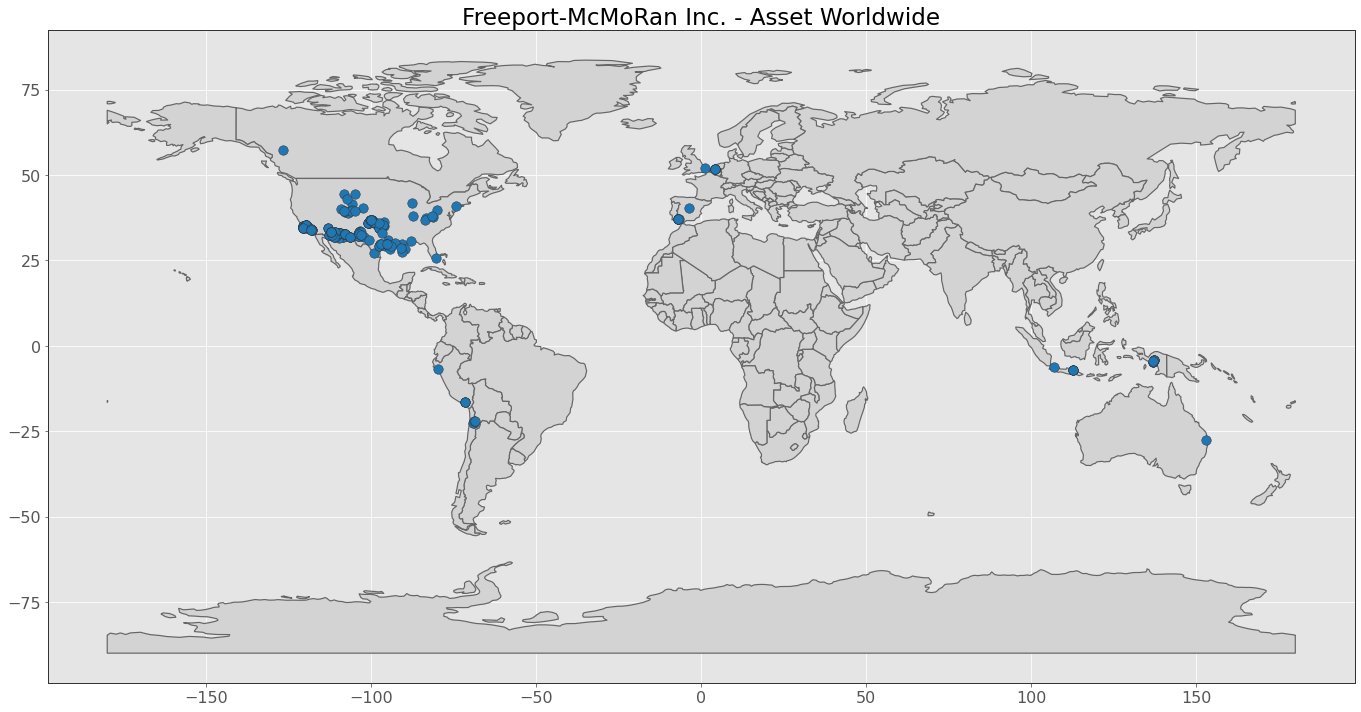

In [30]:
#Plotting All Assets Per Company
companies = [x for x in asset_geography['ultimate_parent_isin'].unique()]
colors = plt.cm.tab10.colors
for company in companies:
    company_assets = asset_geography[asset_geography['ultimate_parent_isin'] == company]
    sf.plot_assets_on_world_map(company_assets, world, colors, by_type=False)

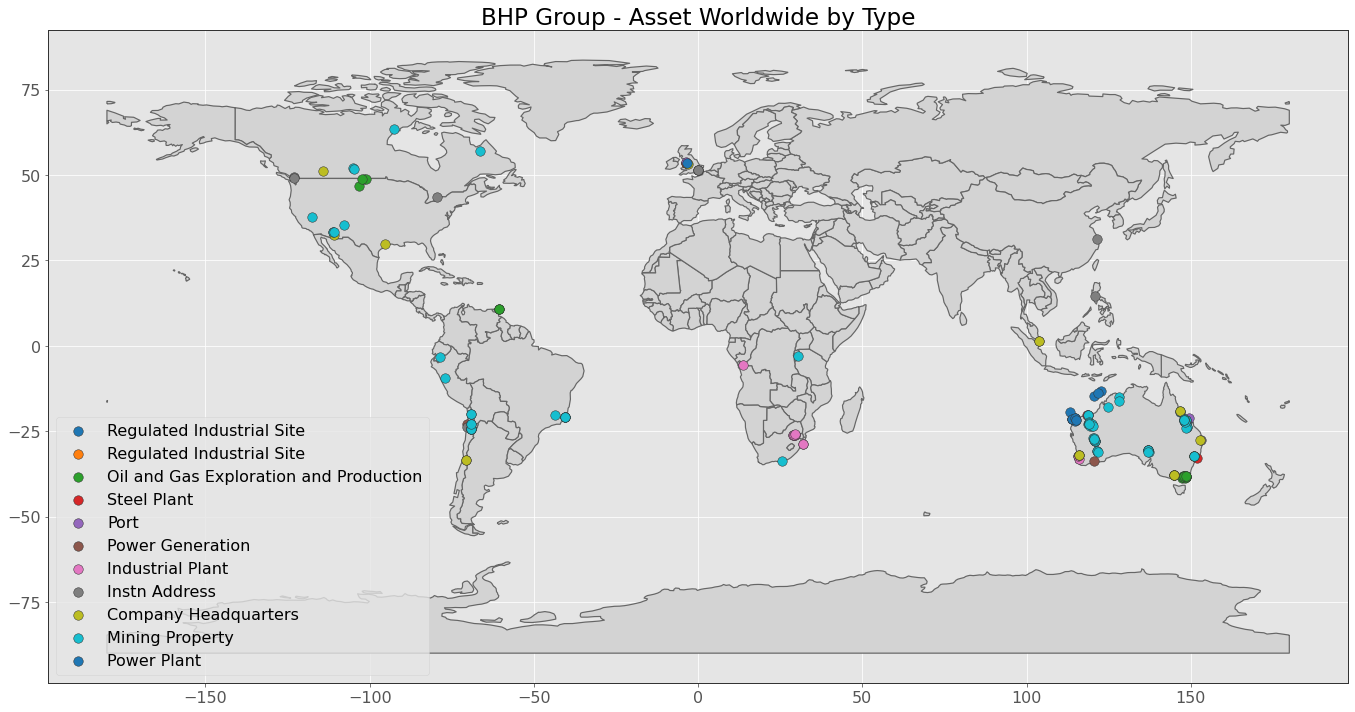

In [31]:
# Plotting By Asset Type:
companies = [x for x in asset_geography['ultimate_parent_isin'].unique()]
for company in companies:
    company_assets = asset_geography[asset_geography['ultimate_parent_isin'] == company]
    sf.plot_assets_on_world_map(company_assets, world, colors, by_type=True)

In [32]:
asset_geography.columns

Index(['data_source', 'key_id', 'asset_id', 'asset_name', 'asset_id_type',
       'year', 'country', 'latitude', 'longitude', 'facility_category',
       'activity_description', 'owner_name', 'owner_mi_key', 'owner_ciq_id',
       'owner_isin', 'ultimate_parent_name', 'ultimate_parent_mi_key',
       'ultimate_parent_ciq_id', 'ultimate_parent_isin', 'trucost_uid',
       'ultimate_parent_uid', 'gics_sector', 'category', 'geometry_epsg_8857',
       'geometry_epsg_4326', 'geometry'],
      dtype='object')

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


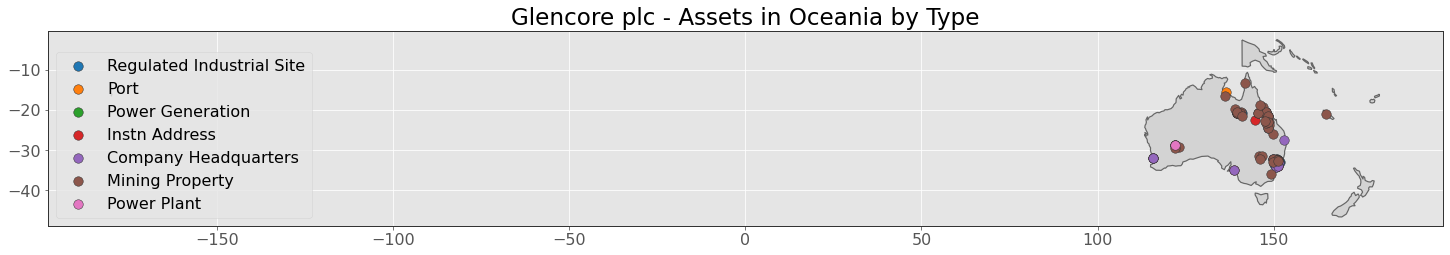

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


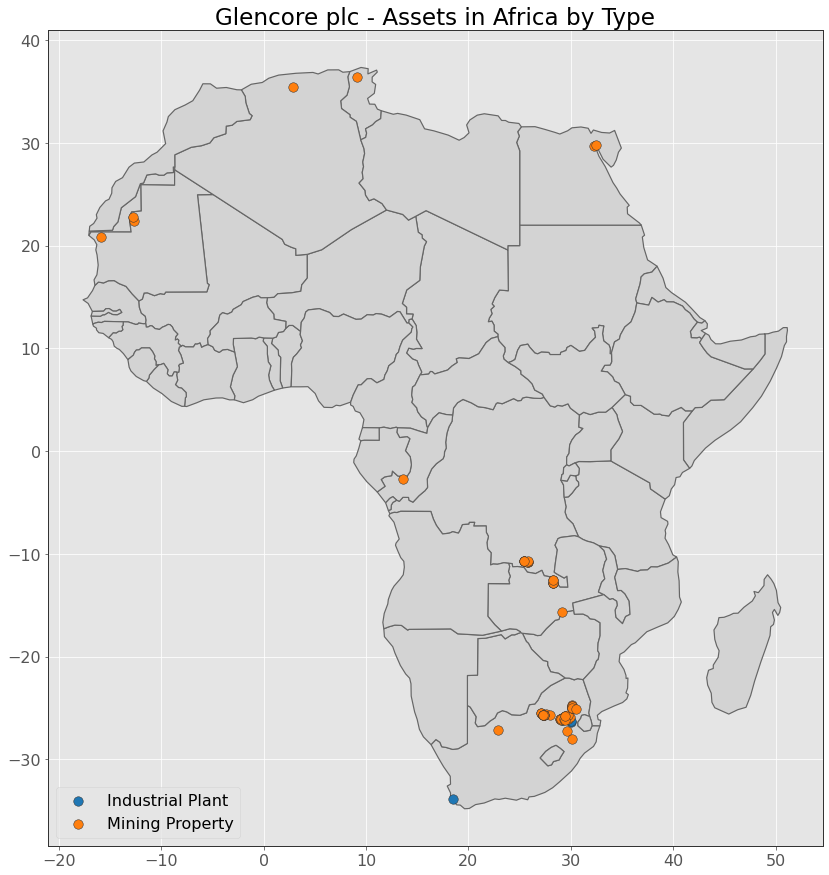

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


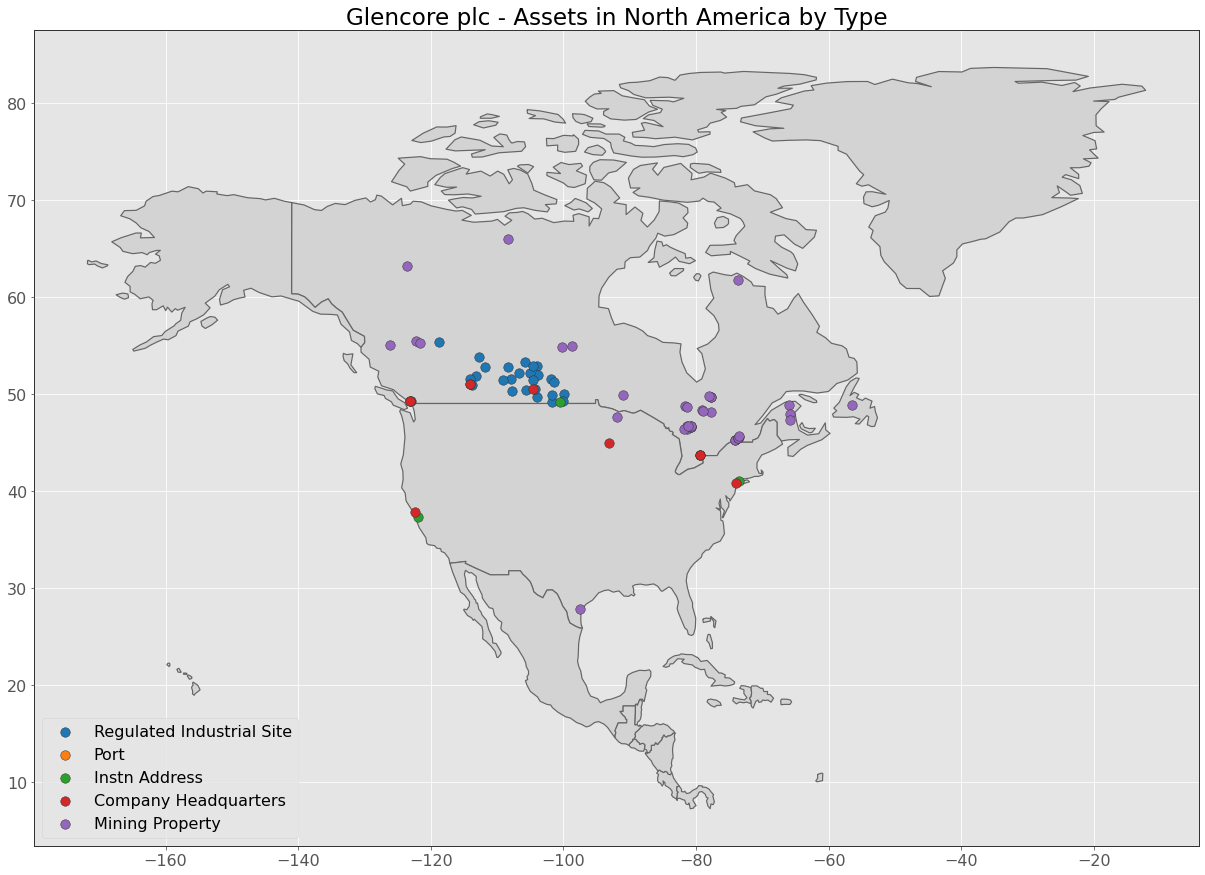

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


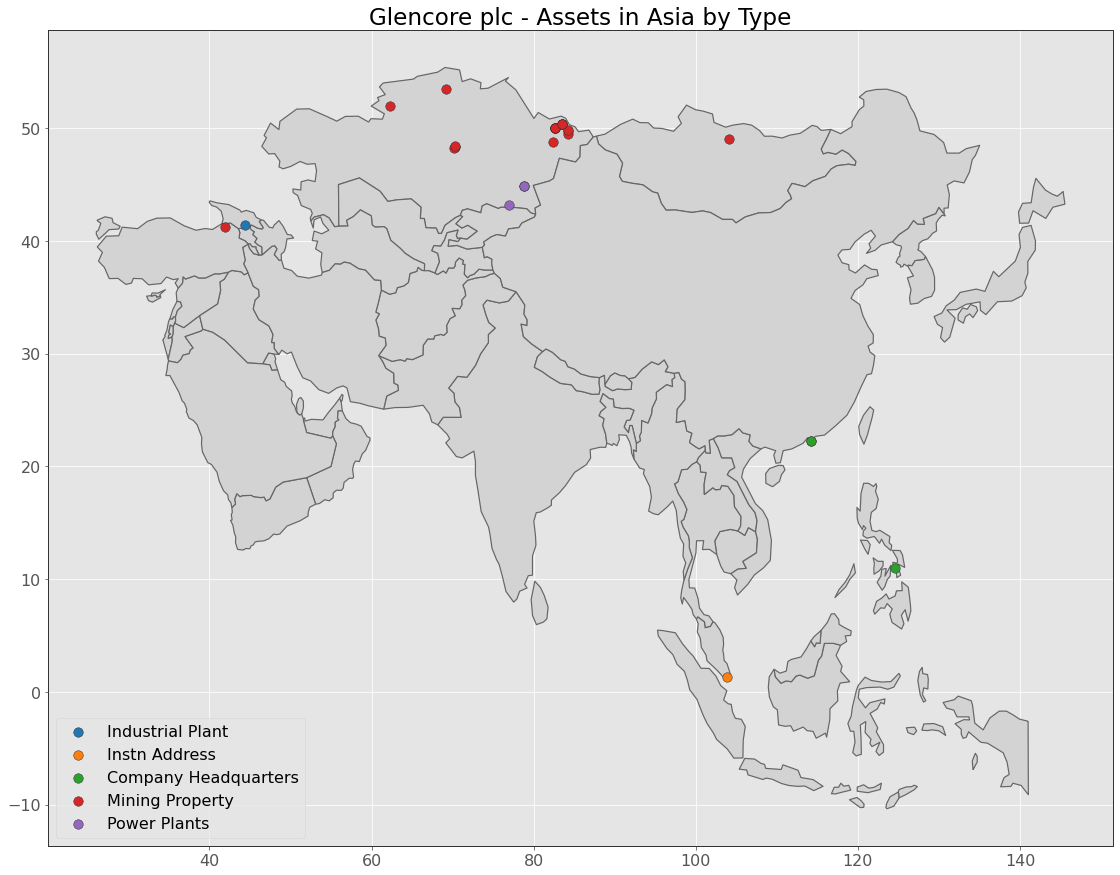

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


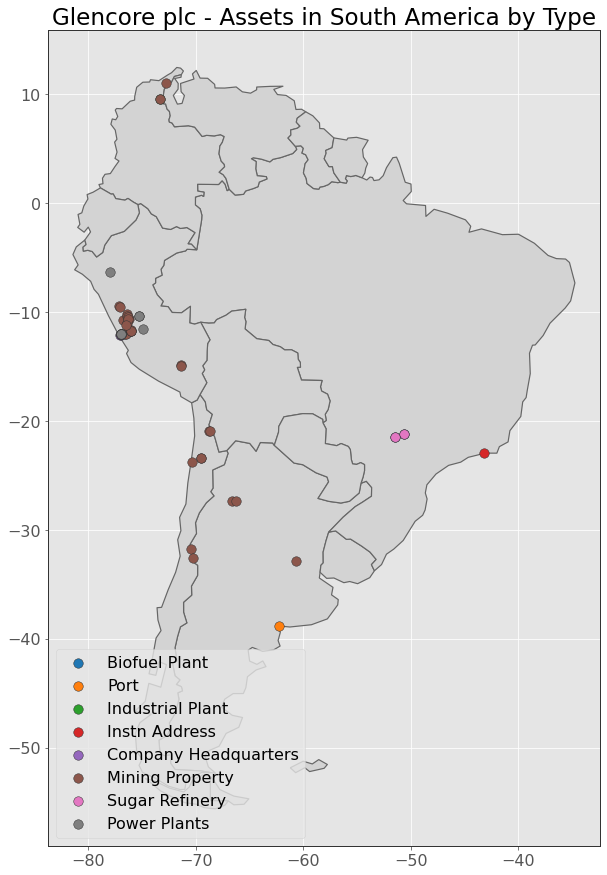

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


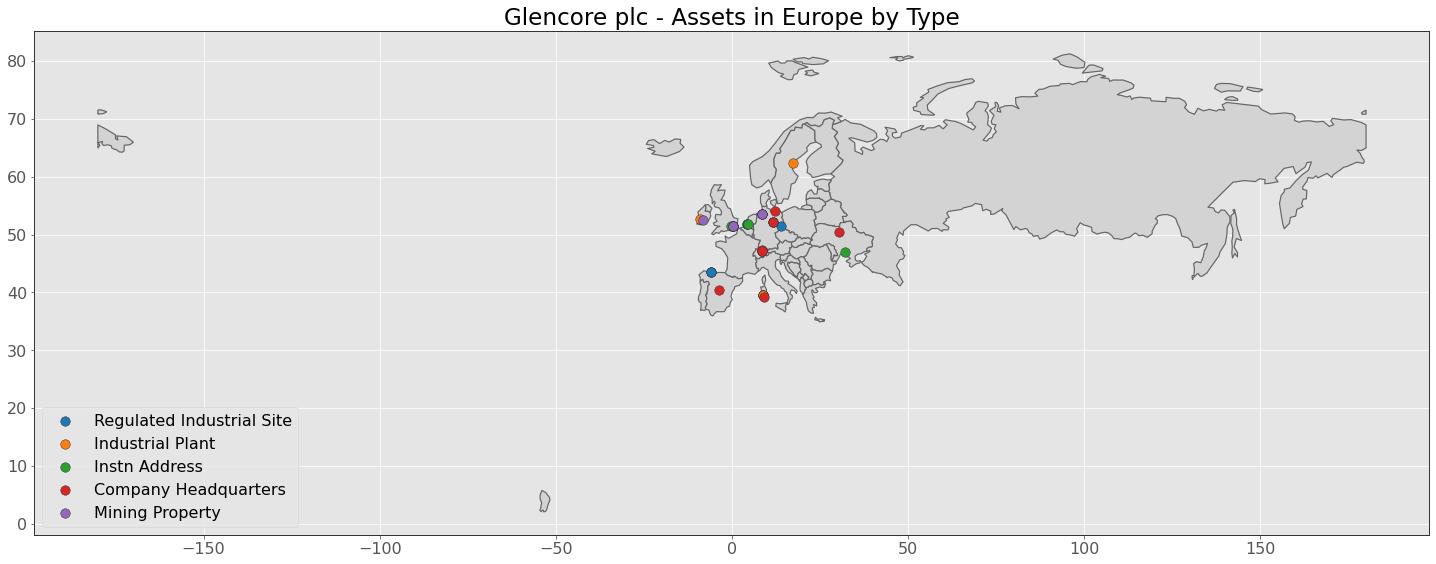

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


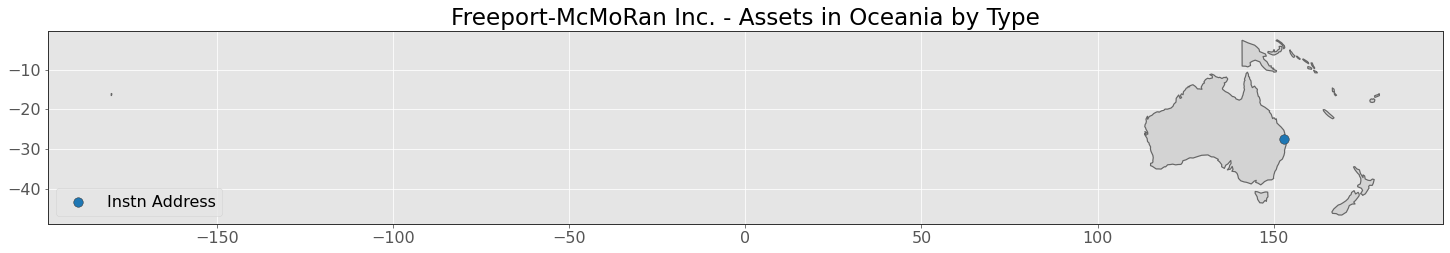

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


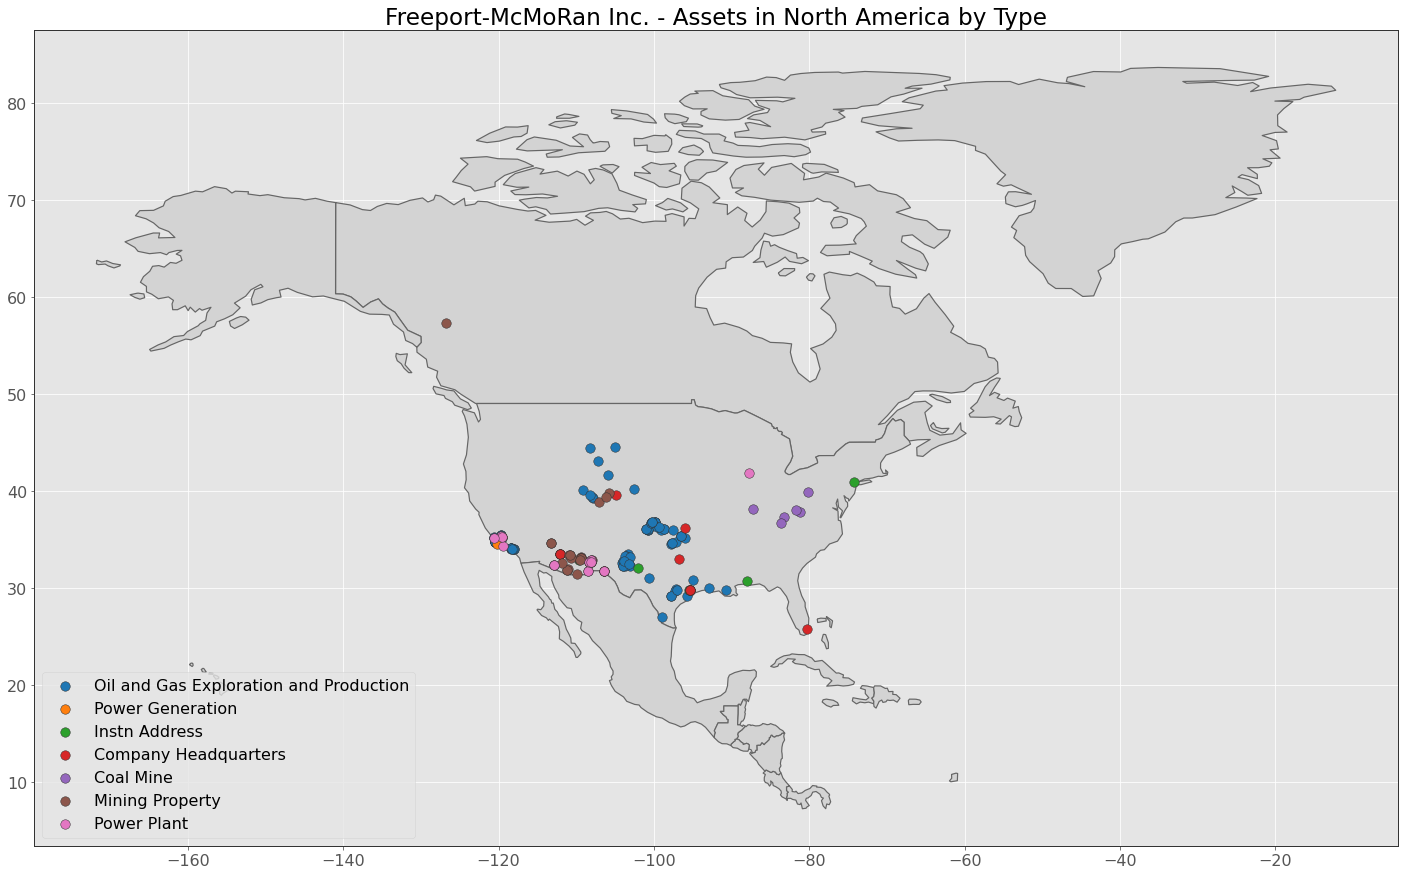

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


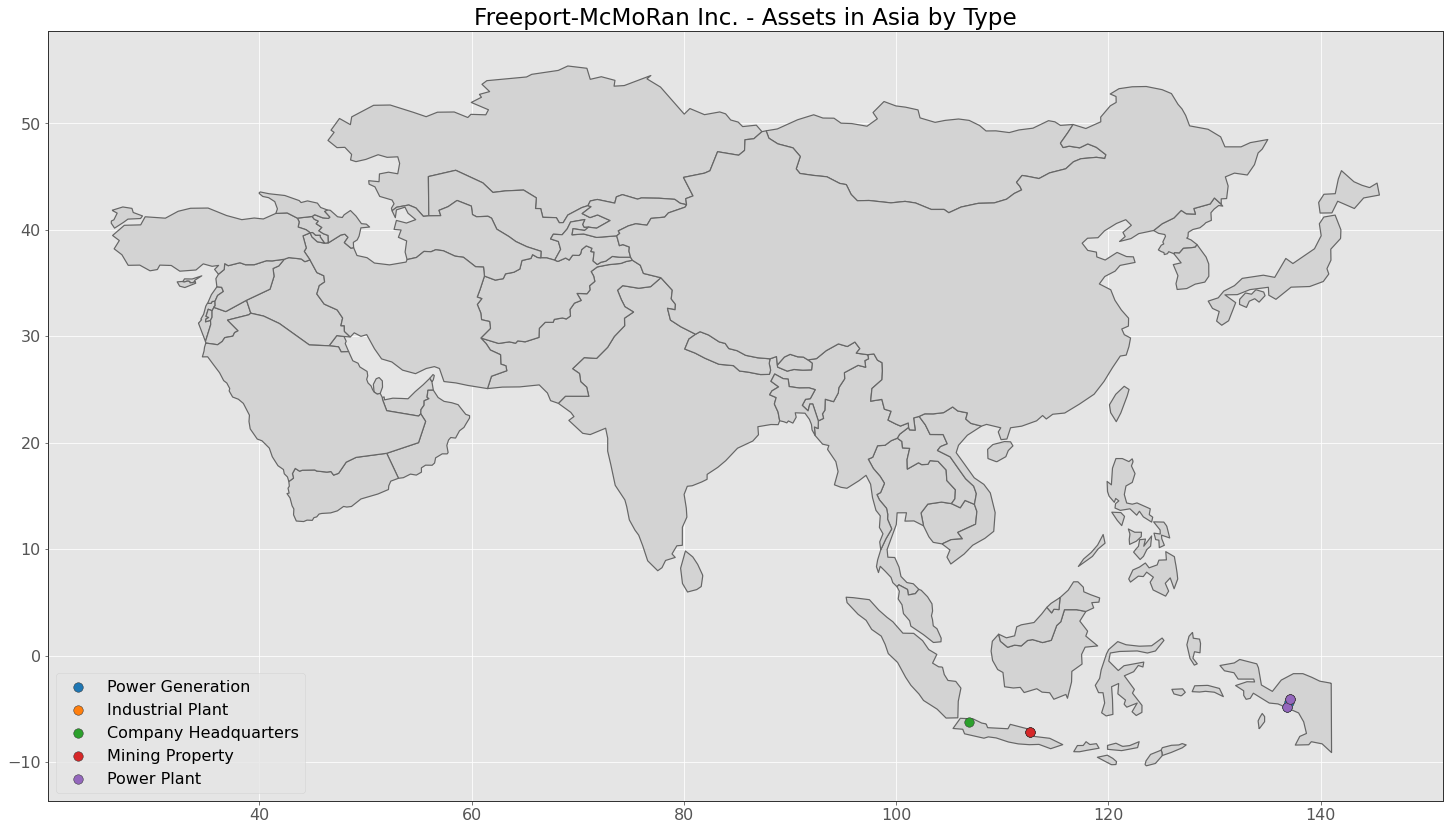

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


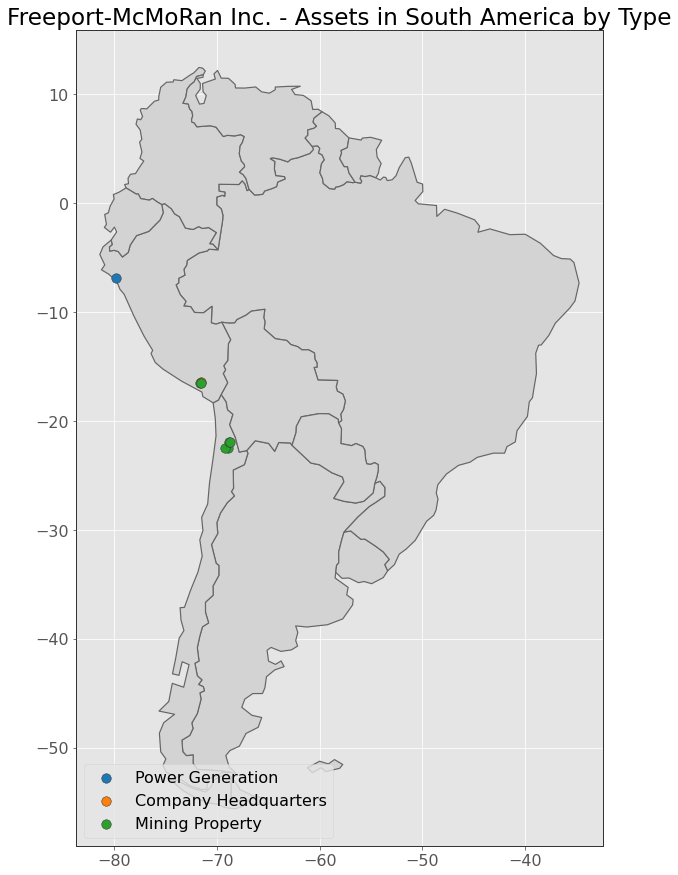

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


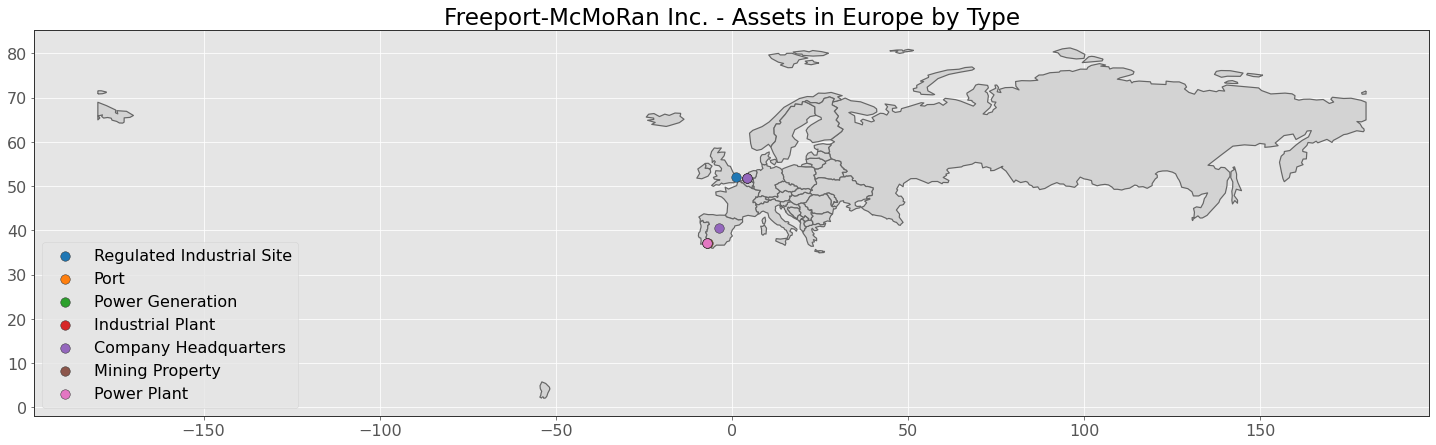

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


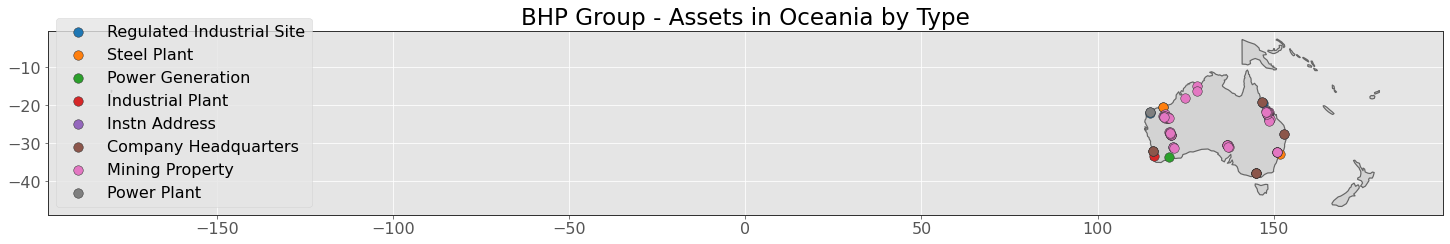

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


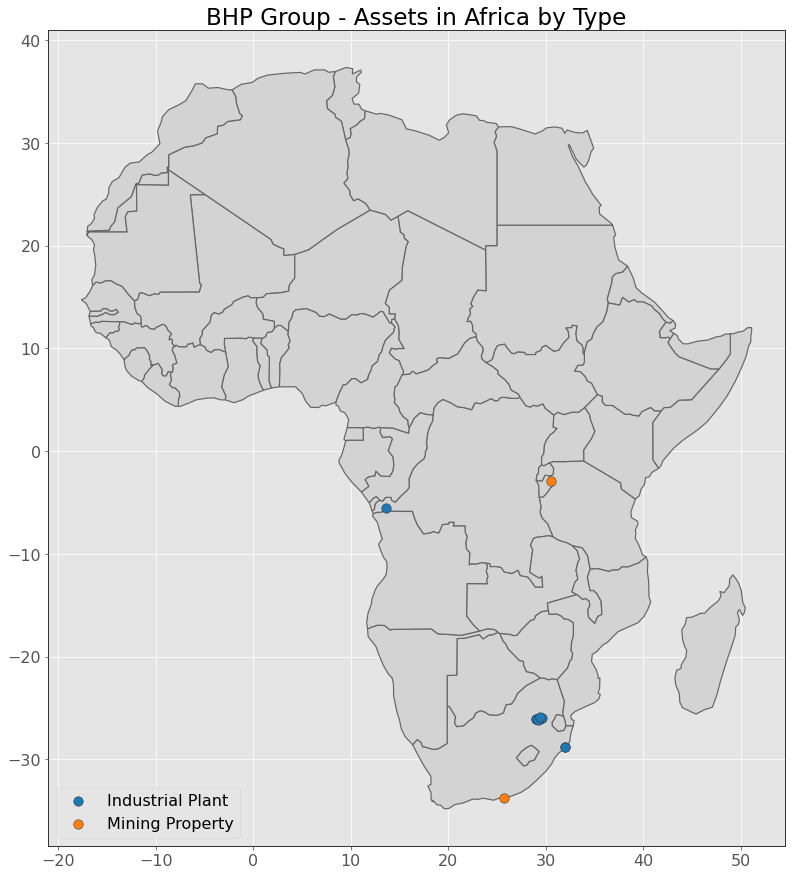

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


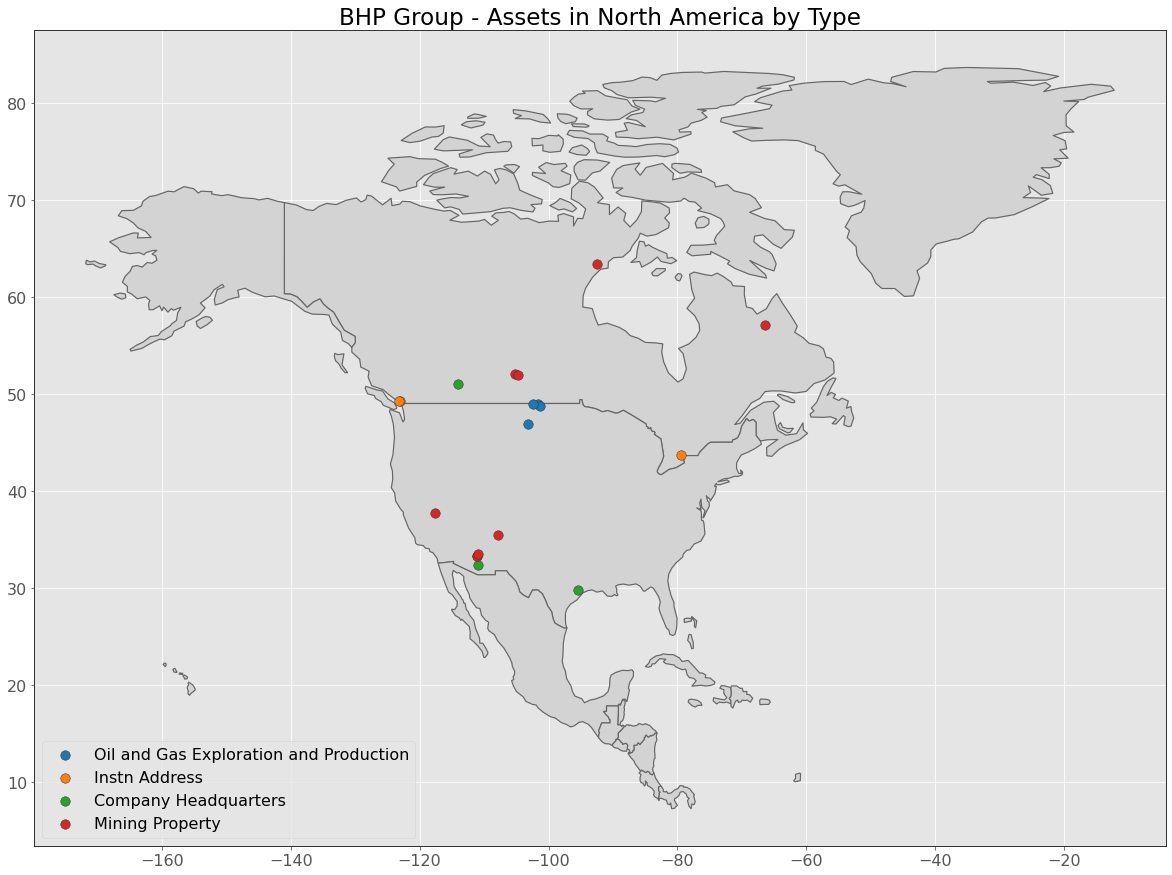

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


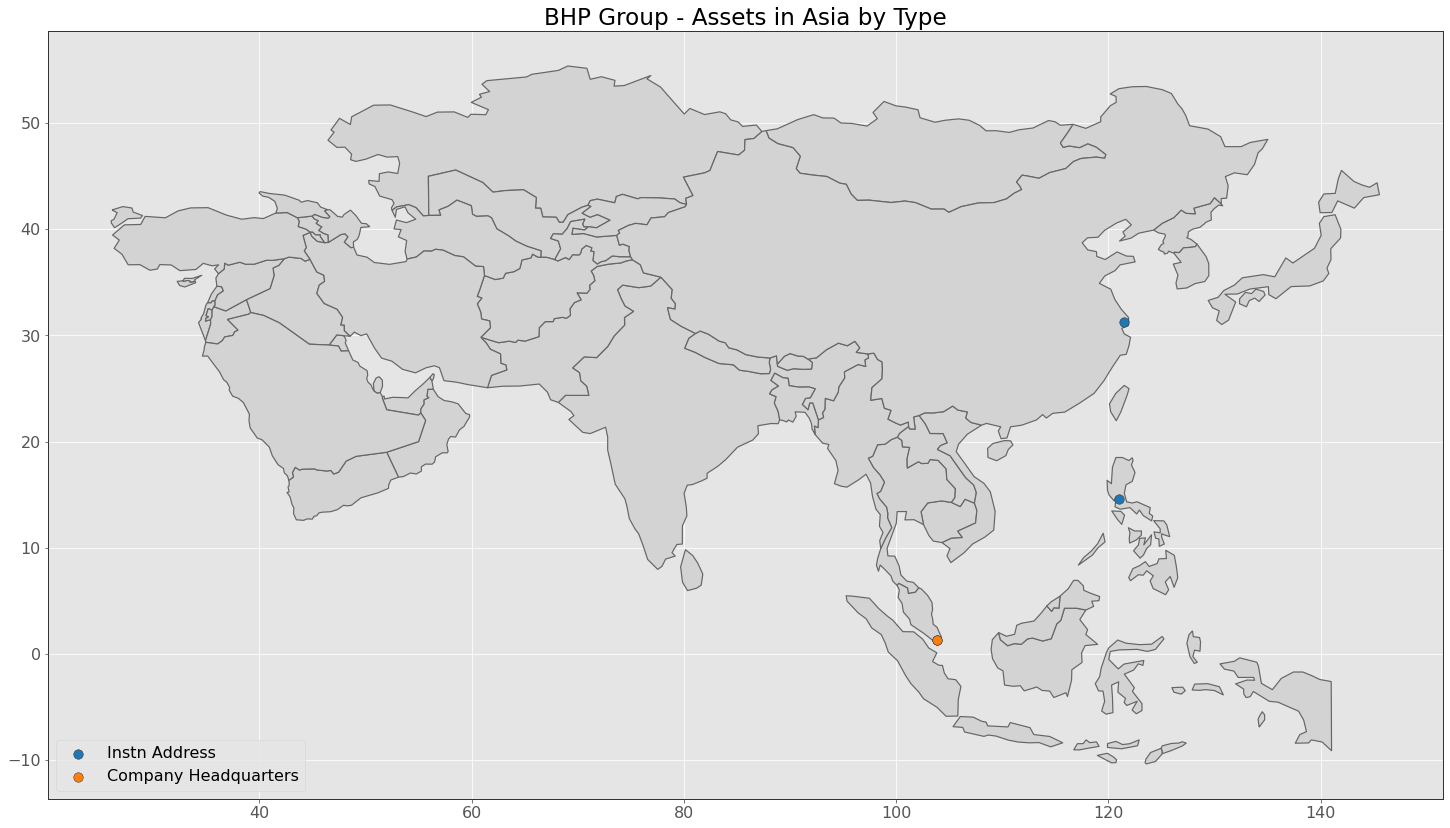

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


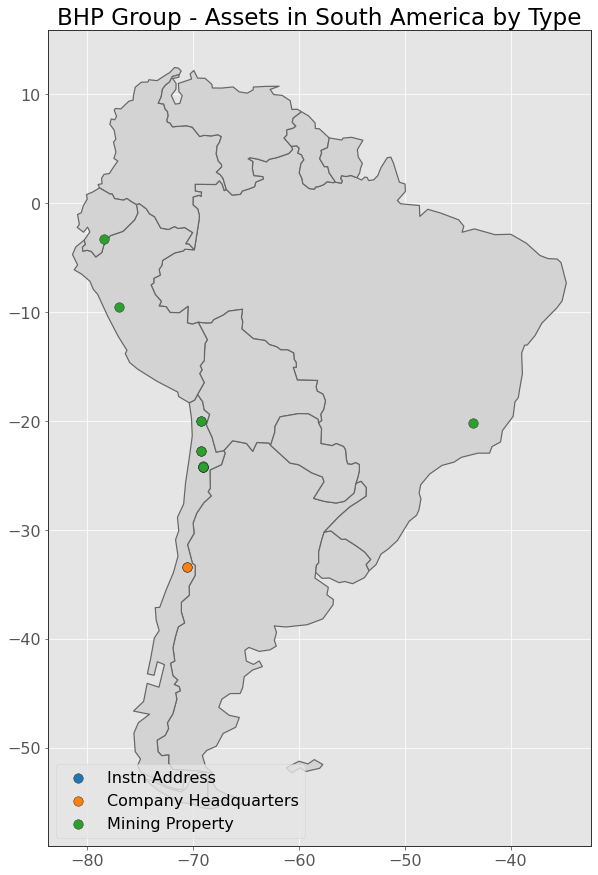

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


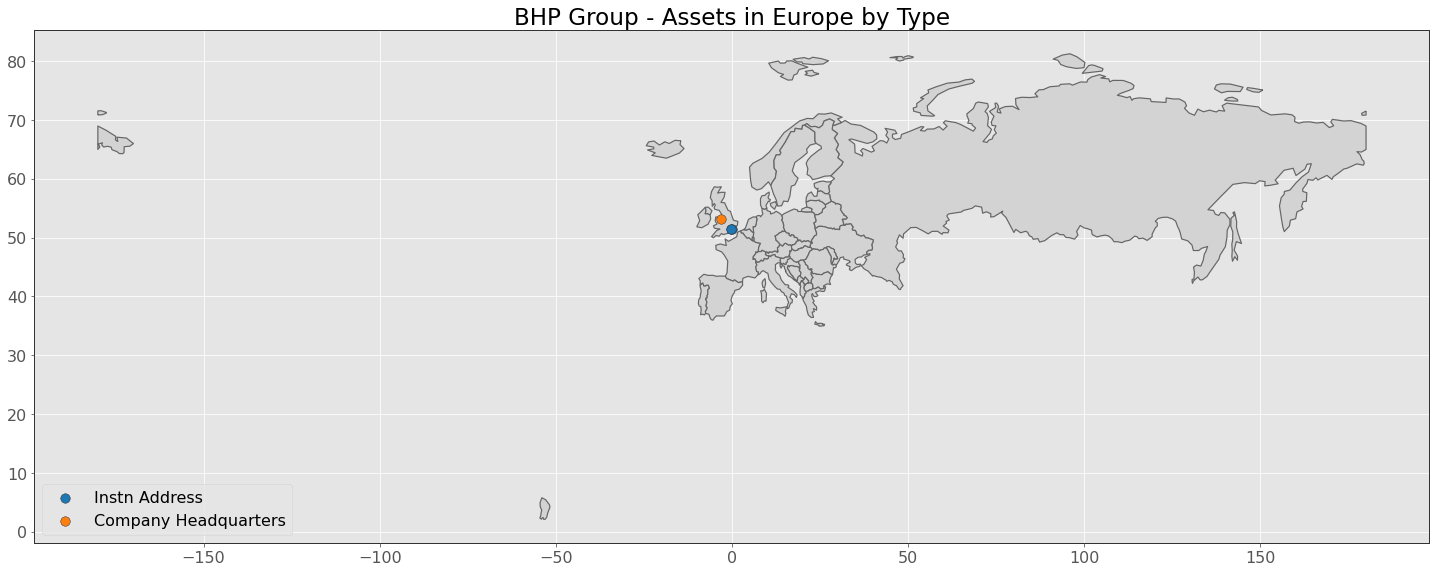

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
#Below I am instead plotting asset at the continent level still by different asset id type
continents = [x for x in world['continent'].unique()]
for company in companies:
    company_assets = asset_geography[asset_geography['ultimate_parent_isin'] == company]
    for continent in continents:
        sf.plot_assets_on_continent(company_assets, world, continent, colors)

**Asset Distribution Analysis**
After visualizing the asset locations, we proceeded to analyze the distribution of these assets across different geographical boundaries, specifically continents.
By using a spatial join between the asset locations and predefined geopolitical boundaries, each asset was associated with its respective continent.
With this information, we then calculated the percentage distribution of assets for each continent, providing insights into which continents hold the most assets for each company.

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


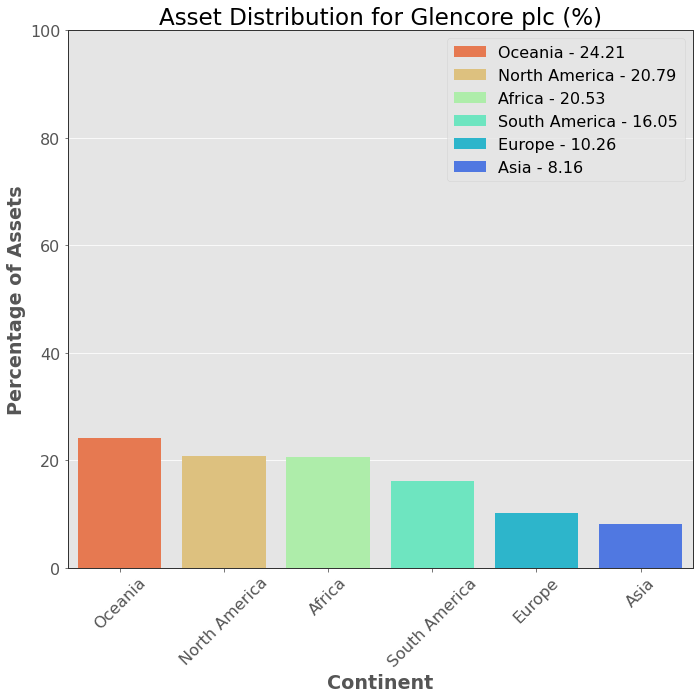

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


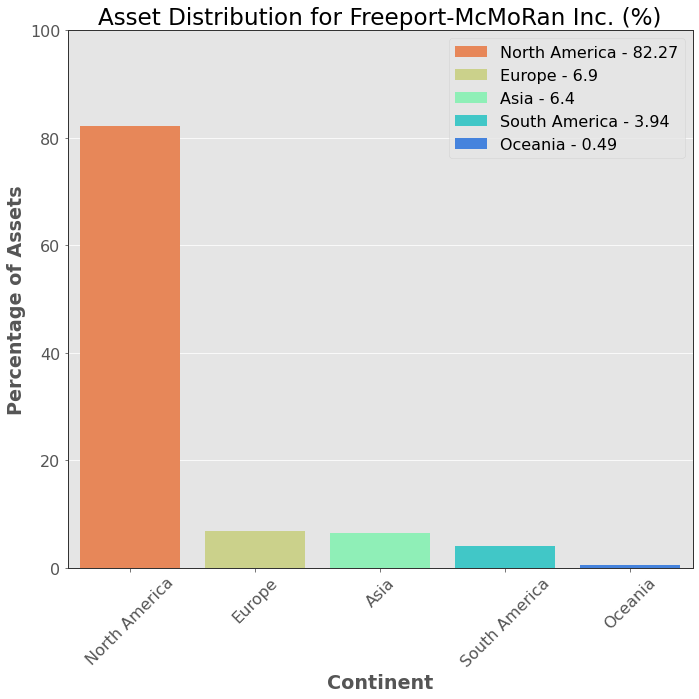

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


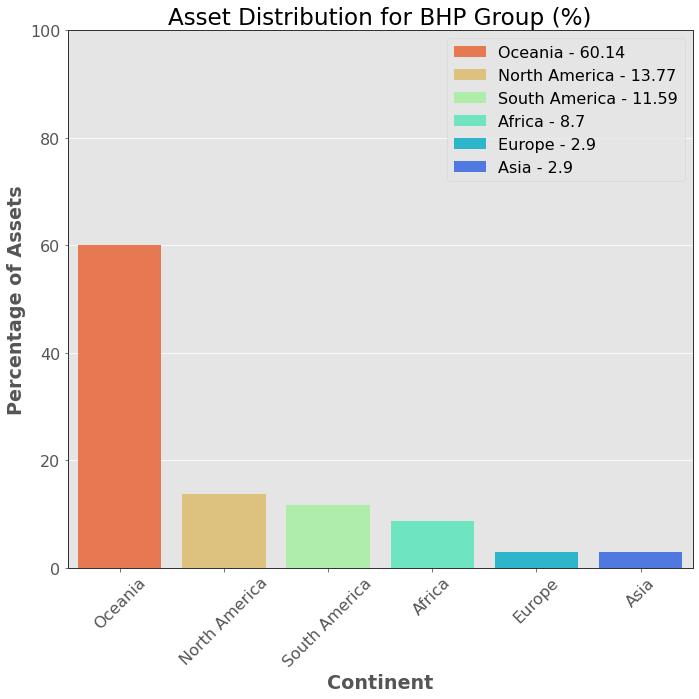

In [34]:
for company in companies:
    company_assets = asset_geography[asset_geography['ultimate_parent_isin'] == company]
    sf.plot_asset_distribution(company_assets, world, percentage=True)


/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


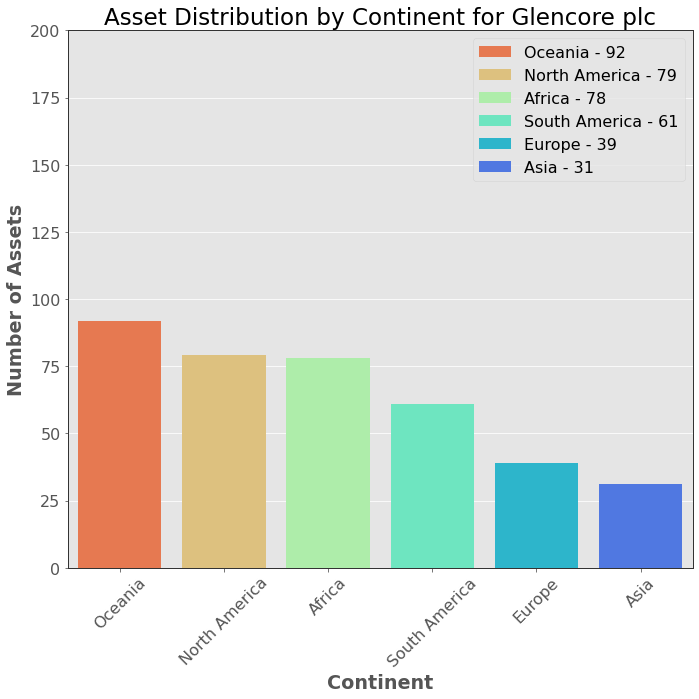

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
for company in companies:
    company_assets = asset_geography[asset_geography['ultimate_parent_isin'] == company]
    sf.plot_asset_distribution(company_assets, world, percentage=False)


# Section 3 - Universe EDA

## 3.1 - General Info on the dataset

**Company Universe Data** This dataset contains water use and revenue-related datapoints on the universe of companies covered by the dataset. It can be considered a relevant representation of businesses across the various sectors of the economy

In [36]:
universe.sample(5)

tcuid  year                companyname          isin countrycode  \
6497    48894  2020   Trican Well Service Ltd.  CA8959451037          CA   
18929  245991  2020      GreenX Metals Limited  AU0000198939          AU   
5965   236458  2020             Orgenesis Inc.  US68619K2042          US   
8969   232062  2021            NanoenTek, Inc.  KR7039860002          KR   
31161  231304  2019  DL Construction Co., Ltd.  KR7001880004          KR   

               countryname  gicscode                        gicsname  \
6497               CANADA   10101020  Oil & Gas Equipment & Services   
18929           AUSTRALIA   15104050                           Steel   
5965        UNITED STATES   35201010                   Biotechnology   
8969   KOREA, REPUBLIC OF   35203010  Life Sciences Tools & Services   
31161  KOREA, REPUBLIC OF   20103010      Construction & Engineering   

      gicssectorname                           gicsindustrygroupname  \
6497          Energy                                          Energy   
18929      Materials                                       Materials   
5965     Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
8969     Health Care  Pharmaceuticals, Biotechnology & Life Sciences   
31161    Industrials                                   Capital Goods   

                     gicsindustryname tc464_primarysectorreference  \
6497      Energy Equipment & Services                       213112   
18929                 Metals & Mining                       533000   
5965                    Biotechnology                       541700   
8969   Life Sciences Tools & Services                       325413   
31161      Construction & Engineering                       230103   

                                 tc464_primarysectorname  tctotalrevenue  \
6497   Support activities for oil and gas operations ...         296.048   
18929  Lessors of nonfinancial intangible assets     ...           0.306   
5965   Scientific research and development services  ...           7.652   
8969   In-vitro diagnostic substance manufacturing   ...          31.247   
31161  Other nonresidential structures               ...        1098.439   

        tcebitda     tcebit  tcabswaterdirectcooling  tcabswaterdirectprocess  \
6497      10.184    -95.651                      NaN                52461.213   
18929     -3.067     -3.153                      NaN                      NaN   
5965     -94.557    -95.099                      NaN                      NaN   
8969    7890.054   5236.289                      NaN               292443.301   
31161 164694.656 159329.656                      NaN               320419.897   

       tcabswaterpurchased  tcabswaterdirectandpurchased  
6497             55448.130                    107909.343  
18929              114.990                       114.990  
5965              2322.834                      2322.834  
8969              5148.650                    297591.951  
31161           154649.265                    475069.161

In [37]:
universe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53228 entries, 0 to 53227
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tcuid                         53228 non-null  int64  
 1   year                          53228 non-null  int64  
 2   companyname                   53228 non-null  object 
 3   isin                          53220 non-null  object 
 4   countrycode                   53225 non-null  object 
 5   countryname                   53228 non-null  object 
 6   gicscode                      53228 non-null  int64  
 7   gicsname                      53228 non-null  object 
 8   gicssectorname                53228 non-null  object 
 9   gicsindustrygroupname         53228 non-null  object 
 10  gicsindustryname              53228 non-null  object 
 11  tc464_primarysectorreference  53228 non-null  object 
 12  tc464_primarysectorname       53228 non-null  object 
 13  t

In [38]:
len(universe['gicsname'].sort_values().unique()), len(universe['gicscode'].sort_values().unique())

(177, 177)

In [39]:
(universe['gicsname'].sort_values().unique())

array(['Advertising', 'Aerospace & Defense',
       'Agricultural & Farm Machinery',
       'Agricultural Products & Services', 'Air Freight & Logistics',
       'Airport Services', 'Alternative Carriers', 'Aluminum',
       'Apparel Retail', 'Apparel, Accessories & Luxury Goods',
       'Application Software', 'Asset Management & Custody Banks',
       'Automobile Manufacturers', 'Automotive Parts & Equipment',
       'Automotive Retail', 'Biotechnology', 'Brewers', 'Broadcasting',
       'Broadline Retail', 'Building Products', 'Cable & Satellite',
       'Cargo Ground Transportation', 'Casinos & Gaming',
       'Coal & Consumable Fuels',
       'Commercial & Residential Mortgage Finance', 'Commercial Printing',
       'Commodity Chemicals', 'Communications Equipment',
       'Computer & Electronics Retail', 'Construction & Engineering',
       'Construction Machinery & Heavy Transportation Equipment',
       'Construction Materials', 'Consumer Electronics',
       'Consumer Finance'

In [40]:
universe['gicssectorname'].sort_values().unique()

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [41]:
universe['gicsindustrygroupname'].sort_values().unique()

array(['Automobiles & Components', 'Banks', 'Capital Goods',
       'Commercial  & Professional Services',
       'Consumer Discretionary Distribution & Retail',
       'Consumer Durables & Apparel', 'Consumer Services',
       'Consumer Staples Distribution & Retail', 'Energy',
       'Equity Real Estate Investment Trusts (REITs)',
       'Financial Services', 'Food, Beverage & Tobacco',
       'Health Care Equipment & Services',
       'Household & Personal Products', 'Insurance', 'Materials',
       'Media & Entertainment',
       'Pharmaceuticals, Biotechnology & Life Sciences',
       'Real Estate Management & Development',
       'Semiconductors & Semiconductor Equipment', 'Software & Services',
       'Technology Hardware & Equipment', 'Telecommunication Services',
       'Transportation', 'Utilities'], dtype=object)

In [42]:
universe['gicsindustryname'].sort_values().unique()

array(['Aerospace & Defense', 'Air Freight & Logistics',
       'Automobile Components', 'Automobiles', 'Banks', 'Beverages',
       'Biotechnology', 'Broadline Retail', 'Building Products',
       'Capital Markets', 'Chemicals', 'Commercial Services & Supplies',
       'Communications Equipment', 'Construction & Engineering',
       'Construction Materials', 'Consumer Finance',
       'Consumer Staples Distribution & Retail', 'Containers & Packaging',
       'Distributors', 'Diversified Consumer Services',
       'Diversified REITs', 'Diversified Telecommunication Services',
       'Electric Utilities', 'Electrical Equipment',
       'Electronic Equipment, Instruments & Components',
       'Energy Equipment & Services', 'Entertainment',
       'Financial Services', 'Food Products', 'Gas Utilities',
       'Ground Transportation', 'Health Care Equipment & Supplies',
       'Health Care Providers & Services', 'Health Care REITs ',
       'Health Care Technology', 'Hotel & Resort REITs '

In [43]:
universe['year'].sort_values().unique()

array([2019, 2020, 2021, 2022])

## 3.2 -  Data Visualization

In [44]:
universe.columns

Index(['tcuid', 'year', 'companyname', 'isin', 'countrycode', 'countryname',
       'gicscode', 'gicsname', 'gicssectorname', 'gicsindustrygroupname',
       'gicsindustryname', 'tc464_primarysectorreference',
       'tc464_primarysectorname', 'tctotalrevenue', 'tcebitda', 'tcebit',
       'tcabswaterdirectcooling', 'tcabswaterdirectprocess',
       'tcabswaterpurchased', 'tcabswaterdirectandpurchased'],
      dtype='object')

Particularly Focus in the following column:
1. **tcabswaterdirectcooling** This is Company annual water abstraction for cooling, expressed in cubic meter (m3)
2. **tcabswaterdirectprocess** Company annual water abstarction for its own process, expressed in cubic meter (m3)
3. **tcabswaterpurchased** This is Company annual water purchased for cooling, expressed in cubic meter (m3)
4. **tcabswaterdirectandpurchased** company annual water abstarction and purchase
5. **tctotalrevenue** Company Total Revenue

In [45]:
#I want to convert year in datetime
universe['year'] = pd.to_datetime(universe['year'])
universe = universe.set_index('year').sort_index()
universe 



tcuid  \
year                                    
1970-01-01 00:00:00.000002019  227358   
1970-01-01 00:00:00.000002019  234595   
1970-01-01 00:00:00.000002019  191104   
1970-01-01 00:00:00.000002019  234573   
1970-01-01 00:00:00.000002019  234511   
...                               ...   
1970-01-01 00:00:00.000002022  246948   
1970-01-01 00:00:00.000002022   44222   
1970-01-01 00:00:00.000002022  247821   
1970-01-01 00:00:00.000002022  239642   
1970-01-01 00:00:00.000002022  249335   

                                                               companyname  \
year                                                                         
1970-01-01 00:00:00.000002019                       Beshom Holdings Berhad   
1970-01-01 00:00:00.000002019                     Nippon Kinzoku Co., Ltd.   
1970-01-01 00:00:00.000002019                               SAF-Holland SE   
1970-01-01 00:00:00.000002019                Sunrise Energy Metals Limited   
1970-01-01 00:00:00.000002019  Rashtriya Chemicals and Fertilizers Limited   
...                                                                    ...   
1970-01-01 00:00:00.000002022          Barbeque-Nation Hospitality Limited   
1970-01-01 00:00:00.000002022                               The Kroger Co.   
1970-01-01 00:00:00.000002022                 The Duckhorn Portfolio, Inc.   
1970-01-01 00:00:00.000002022              Zoom Video Communications, Inc.   
1970-01-01 00:00:00.000002022                           Warehouse REIT plc   

                                       isin countrycode      countryname  \
year                                                                       
1970-01-01 00:00:00.000002019  MYL7668OO006          MY        MALAYSIA    
1970-01-01 00:00:00.000002019  JP3698000001          JP           JAPAN    
1970-01-01 00:00:00.000002019  DE000SAFH001          LU      LUXEMBOURG    
1970-01-01 00:00:00.000002019  AU0000143729          AU       AUSTRALIA    
1970-01-01 00:00:00.000002019  INE027A01015          IN           INDIA    
...                                     ...         ...              ...   
1970-01-01 00:00:00.000002022  INE382M01027          IN           INDIA    
1970-01-01 00:00:00.000002022  US5010441013          US   UNITED STATES    
1970-01-01 00:00:00.000002022  US26414D1063          US   UNITED STATES    
1970-01-01 00:00:00.000002022  US98980L1017          US   UNITED STATES    
1970-01-01 00:00:00.000002022  GB00BD2NCM38          GB  UNITED KINGDOM    

                               gicscode  \
year                                      
1970-01-01 00:00:00.000002019  25502020   
1970-01-01 00:00:00.000002019  15104050   
1970-01-01 00:00:00.000002019  25101010   
1970-01-01 00:00:00.000002019  20201050   
1970-01-01 00:00:00.000002019  15101030   
...                                 ...   
1970-01-01 00:00:00.000002022  25301040   
1970-01-01 00:00:00.000002022  30101030   
1970-01-01 00:00:00.000002022  30201020   
1970-01-01 00:00:00.000002022  45103010   
1970-01-01 00:00:00.000002022  60102510   

                                                                        gicsname  \
year                                                                               
1970-01-01 00:00:00.000002019  Internet & Direct Marketing Retail (discont. 2...   
1970-01-01 00:00:00.000002019                                              Steel   
1970-01-01 00:00:00.000002019                       Automotive Parts & Equipment   
1970-01-01 00:00:00.000002019                Environmental & Facilities Services   
1970-01-01 00:00:00.000002019               Fertilizers & Agricultural Chemicals   
...                                                                          ...   
1970-01-01 00:00:00.000002022                                        Restaurants   
1970-01-01 00:00:00.000002022                                        Food Retail   
1970-01-01 00:00:00.000002022                              Distillers & Vintners   
1970-01-01

In [46]:
#let's create two df. One nly with Metals & Mining
mm = universe[universe['gicsindustryname']=='Metals & Mining']

#The other one, with only the three company I am interested into
company_list = [x for x in asset_geography['ultimate_parent_isin'].unique()]
mm_companies =  mm[mm['isin'].isin(company_list)].sort_values(by=['isin','year'])

In [47]:
mm_companies.head()

tcuid        companyname          isin  \
year                                                                     
1970-01-01 00:00:00.000002019   44114  BHP Group Limited  AU000000BHP4   
1970-01-01 00:00:00.000002020   44114  BHP Group Limited  AU000000BHP4   
1970-01-01 00:00:00.000002021   44114  BHP Group Limited  AU000000BHP4   
1970-01-01 00:00:00.000002022   44114  BHP Group Limited  AU000000BHP4   
1970-01-01 00:00:00.000002019  123592       Glencore Plc  JE00B4T3BW64   

                              countrycode   countryname  gicscode  \
year                                                                
1970-01-01 00:00:00.000002019          AU    AUSTRALIA   15104020   
1970-01-01 00:00:00.000002020          AU    AUSTRALIA   15104020   
1970-01-01 00:00:00.000002021          AU    AUSTRALIA   15104020   
1970-01-01 00:00:00.000002022          AU    AUSTRALIA   15104020   
1970-01-01 00:00:00.000002019          CH  SWITZERLAND   15104020   

                                                  gicsname gicssectorname  \
year                                                                        
1970-01-01 00:00:00.000002019  Diversified Metals & Mining      Materials   
1970-01-01 00:00:00.000002020  Diversified Metals & Mining      Materials   
1970-01-01 00:00:00.000002021  Diversified Metals & Mining      Materials   
1970-01-01 00:00:00.000002022  Diversified Metals & Mining      Materials   
1970-01-01 00:00:00.000002019  Diversified Metals & Mining      Materials   

                              gicsindustrygroupname gicsindustryname  \
year                                                                   
1970-01-01 00:00:00.000002019             Materials  Metals & Mining   
1970-01-01 00:00:00.000002020             Materials  Metals & Mining   
1970-01-01 00:00:00.000002021             Materials  Metals & Mining   
1970-01-01 00:00:00.000002022             Materials  Metals & Mining   
1970-01-01 00:00:00.000002019             Materials  Metals & Mining   

                              tc464_primarysectorreference  \
year                                                         
1970-01-01 00:00:00.000002019                       212210   
1970-01-01 00:00:00.000002020                       212210   
1970-01-01 00:00:00.000002021                       212210   
1970-01-01 00:00:00.000002022                       212210   
1970-01-01 00:00:00.000002019                      424700A   

                                                         tc464_primarysectorname  \
year                                                                               
1970-01-01 00:00:00.000002019  Iron ore mining                               ...   
1970-01-01 00:00:00.000002020  Iron ore mining                               ...   
1970-01-01 00:00:00.000002021  Iron ore mining                               ...   
1970-01-01 00:00:00.000002022  Iron ore mining                               ...   
1970-01-01 00:00:00.000002019  Petroleum, Chemical, and Allied Products Whole...   

                               tctotalrevenue  tcebitda    tcebit  \
year                                                                
1970-01-01 00:00:00.000002019       44288.010 21936.000 16079.000   
1970-01-01 00:00:00.000002020       42931.000 20461.000 15005.000   
1970-01-01 00:00:00.000002021       61231.000 33265.000 28962.000   
1970-01-01 00:00:00.000002022       65411.000 37648.000 32940.000   
1970-01-01 00:00:00.000002019      215111.000  9981.000  1616.000   

                               tcabswaterdirectcooling  \
year                                                     
1970-01-01 00:00:00.000002019                      NaN   
1970-01-01 00:00:00.000002020                      NaN   
1970-01-01 00:00:00.000002021                      NaN   
1970-01-01 00:00:00.000002022                      NaN   
1970-01-01 00:00:00.000002019                      NaN   

                               tcabswaterdirectprocess  tcabswaterpur

In [48]:
mm.sample(5)

tcuid  \
year                                    
1970-01-01 00:00:00.000002019   84256   
1970-01-01 00:00:00.000002021  237872   
1970-01-01 00:00:00.000002019   44072   
1970-01-01 00:00:00.000002020  246845   
1970-01-01 00:00:00.000002019   43856   

                                                           companyname  \
year                                                                     
1970-01-01 00:00:00.000002019  Zhaojin Mining Industry Company Limited   
1970-01-01 00:00:00.000002021                   Aurelia Metals Limited   
1970-01-01 00:00:00.000002019          United States Steel Corporation   
1970-01-01 00:00:00.000002020                  Aeris Resources Limited   
1970-01-01 00:00:00.000002019                    Freeport-McMoRan Inc.   

                                       isin countrycode     countryname  \
year                                                                      
1970-01-01 00:00:00.000002019  CNE1000004R6          CN          CHINA    
1970-01-01 00:00:00.000002021  AU000000AMI1          AU      AUSTRALIA    
1970-01-01 00:00:00.000002019  US9129091081          US  UNITED STATES    
1970-01-01 00:00:00.000002020  AU000000AIS8          AU      AUSTRALIA    
1970-01-01 00:00:00.000002019  US35671D8570          US  UNITED STATES    

                               gicscode                     gicsname  \
year                                                                   
1970-01-01 00:00:00.000002019  15104030                         Gold   
1970-01-01 00:00:00.000002021  15104020  Diversified Metals & Mining   
1970-01-01 00:00:00.000002019  15104050                        Steel   
1970-01-01 00:00:00.000002020  15104025                       Copper   
1970-01-01 00:00:00.000002019  15104025                       Copper   

                              gicssectorname gicsindustrygroupname  \
year                                                                 
1970-01-01 00:00:00.000002019      Materials             Materials   
1970-01-01 00:00:00.000002021      Materials             Materials   
1970-01-01 00:00:00.000002019      Materials             Materials   
1970-01-01 00:00:00.000002020      Materials             Materials   
1970-01-01 00:00:00.000002019      Materials             Materials   

                              gicsindustryname tc464_primarysectorreference  \
year                                                                          
1970-01-01 00:00:00.000002019  Metals & Mining                       212221   
1970-01-01 00:00:00.000002021  Metals & Mining                       212221   
1970-01-01 00:00:00.000002019  Metals & Mining                       331110   
1970-01-01 00:00:00.000002020  Metals & Mining                      212234A   
1970-01-01 00:00:00.000002019  Metals & Mining                       331411   

                                                         tc464_primarysectorname  \
year                                                                               
1970-01-01 00:00:00.000002019                                    Gold Ore Mining   
1970-01-01 00:00:00.000002021                                    Gold Ore Mining   
1970-01-01 00:00:00.000002019  Iron and steel mills and ferroalloy manufacturing   
1970-01-01 00:00:00.000002020                                      Copper Mining   
1970-01-01 00:00:00.000002019  Primary smelting and refining of copper       ...   

                               tctotalrevenue  tcebitda   tcebit  \
year                                                               
1970-01-01 00:00:00.000002019         916.352  1878.216  835.669   
1970-01-01 00:00:00.000002021         310.489   161.162   91.273   
1970-01-01 00:00:00.000002019       12937.000   440.000 -126.000   
1970-01-01 00:00:00.000002020         152.416    29.646  -22.599   
1970-01-01 00:00:00.000002019       14402.000  2312.000  680.000   

                               tcabswaterdirectcooling  \
year                     

In [49]:
mm.isnull().mean()

tcuid                          0.000
companyname                    0.000
isin                           0.000
countrycode                    0.000
countryname                    0.000
gicscode                       0.000
gicsname                       0.000
gicssectorname                 0.000
gicsindustrygroupname          0.000
gicsindustryname               0.000
tc464_primarysectorreference   0.000
tc464_primarysectorname        0.000
tctotalrevenue                 0.000
tcebitda                       0.000
tcebit                         0.000
tcabswaterdirectcooling        0.927
tcabswaterdirectprocess        0.032
tcabswaterpurchased            0.000
tcabswaterdirectandpurchased   0.000
dtype: float64

In [50]:
mm_companies.isnull().mean()

tcuid                          0.000
companyname                    0.000
isin                           0.000
countrycode                    0.000
countryname                    0.000
gicscode                       0.000
gicsname                       0.000
gicssectorname                 0.000
gicsindustrygroupname          0.000
gicsindustryname               0.000
tc464_primarysectorreference   0.000
tc464_primarysectorname        0.000
tctotalrevenue                 0.000
tcebitda                       0.000
tcebit                         0.000
tcabswaterdirectcooling        1.000
tcabswaterdirectprocess        0.000
tcabswaterpurchased            0.000
tcabswaterdirectandpurchased   0.000
dtype: float64

In [51]:
mm_companies.describe().iloc[:,3:]

tcebitda    tcebit  tcabswaterdirectcooling  tcabswaterdirectprocess  \
count    10.000    10.000                    0.000                   10.000   
mean  16420.400 11756.100                      NaN            414000000.000   
std   11939.262 11562.879                      NaN            273902659.108   
min    2312.000   680.000                      NaN            186000000.000   
25%    8622.000  2031.500                      NaN            266250000.000   
50%   13314.000  9093.500                      NaN            302500000.000   
75%   21567.250 15810.500                      NaN            373250000.000   
max   37648.000 32940.000                      NaN            933000000.000   

       tcabswaterpurchased  tcabswaterdirectandpurchased  
count               10.000                        10.000  
mean          34150000.000                 448600000.000  
std           44751343.866                 317372616.616  
min                  0.000                 186000000.000  
25%                  0.000                 268750000.000  
50%           23250000.000                 331000000.000  
75%           34750000.000                 379000000.000  
max          116000000.000                1050000000.000

In [52]:
mm.describe().iloc[:,3:]

tcebitda       tcebit  tcabswaterdirectcooling  \
count     1818.000     1818.000                  133.000   
mean     86733.170    61531.768            196842124.313   
std    1255980.255  1034997.072            640753195.708   
min      -9214.000  -118681.000                    0.000   
25%        109.516       31.120                 1267.657   
50%        793.614      418.108             11300000.000   
75%       4890.531     3021.389             94600000.000   
max   43719006.020 37700000.000           5380000000.000   

       tcabswaterdirectprocess  tcabswaterpurchased  \
count                 1759.000             1818.000   
mean              69306641.491          2113077.803   
std              372373078.166         10701646.172   
min                      0.000                0.000   
25%                1336486.348                0.000   
50%                8629000.000           109452.161   
75%               38200000.000           999500.000   
max             8700000000.000        333000000.000   

       tcabswaterdirectandpurchased  
count                      1818.000  
mean                   83563309.677  
std                   429768564.485  
min                           0.000  
25%                     1289032.778  
50%                     9038435.818  
75%                    43100000.000  
max                  8700000000.000

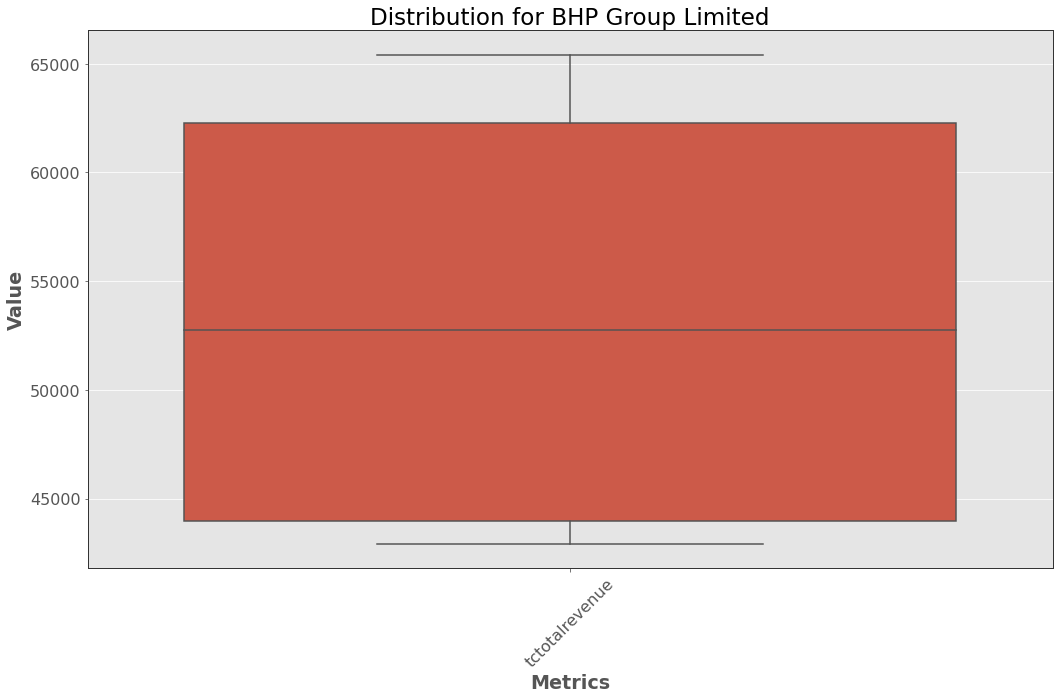

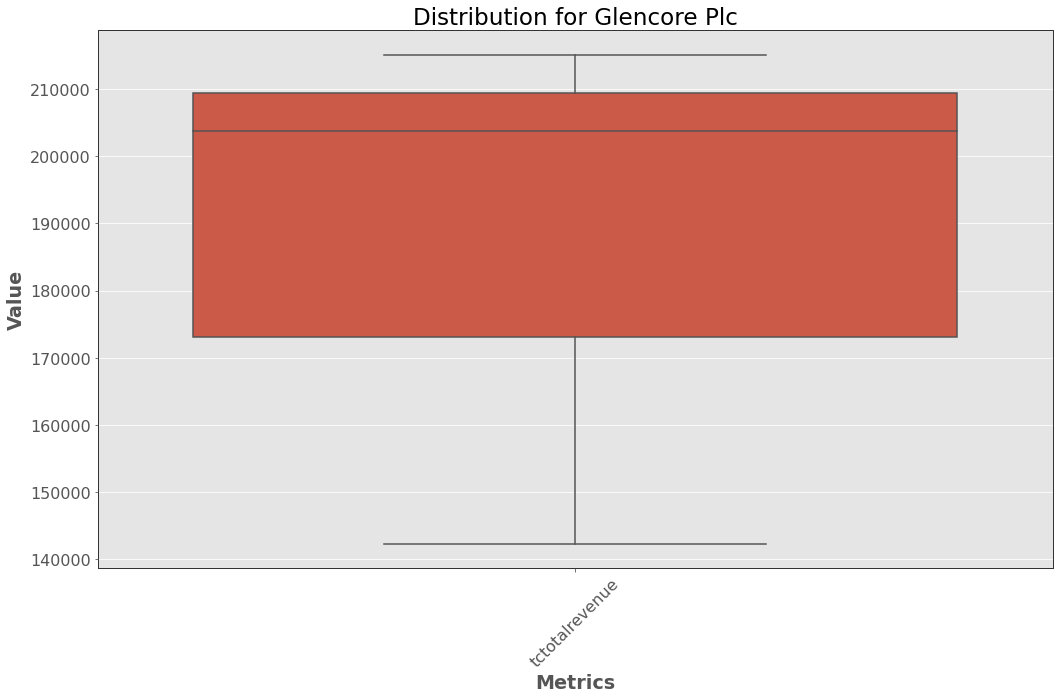

In [53]:
# Using the function for a specific company:

companies_to_plot = [x for x in mm_companies['companyname'].unique()]
financial_metrics = ['tctotalrevenue']

for company in companies_to_plot:
    sf.create_single_company_boxplot(mm_companies, company, financial_metrics)

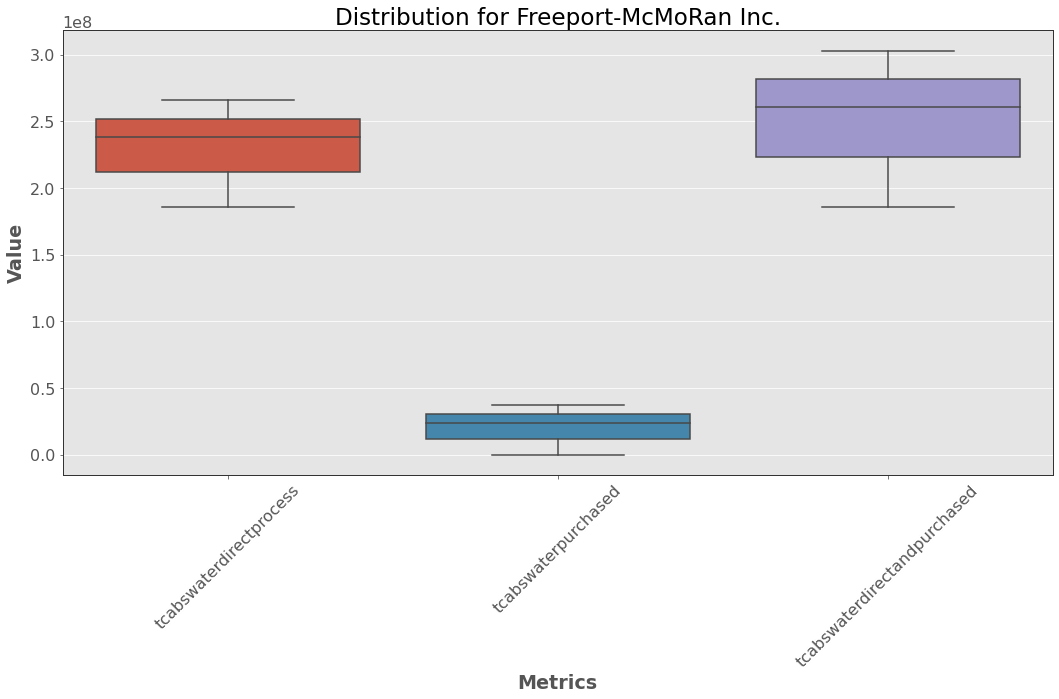

In [54]:
water_metrics = ['tcabswaterdirectprocess'
                 , 'tcabswaterpurchased'
                 , 'tcabswaterdirectandpurchased']
for company in companies_to_plot:
    sf.create_single_company_boxplot(mm_companies, company, water_metrics)

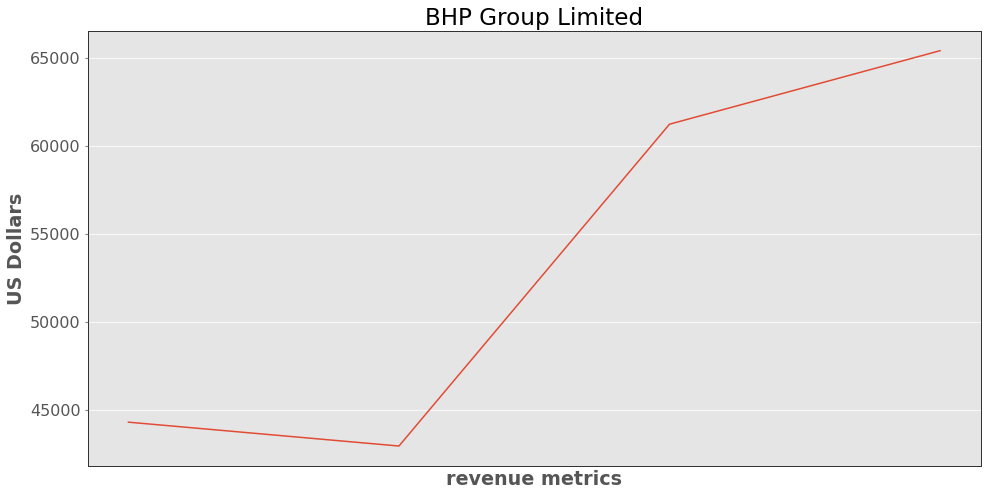

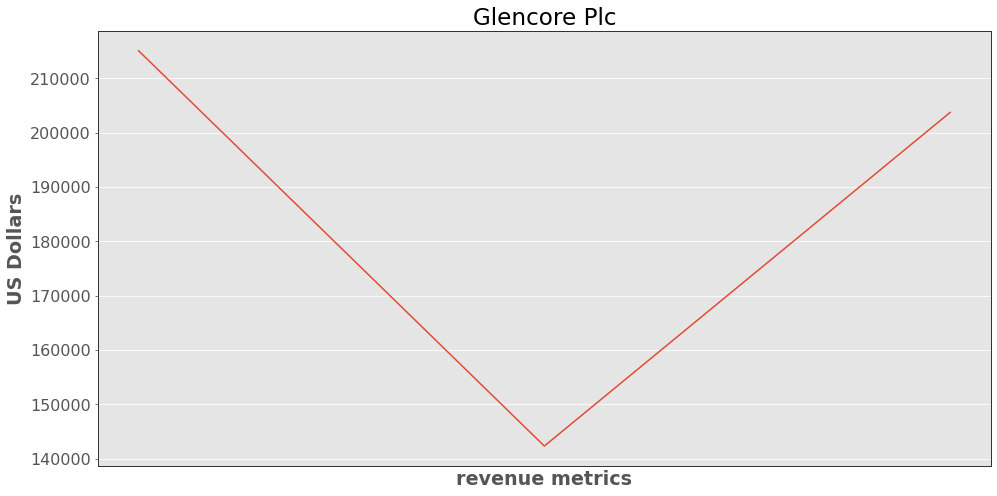

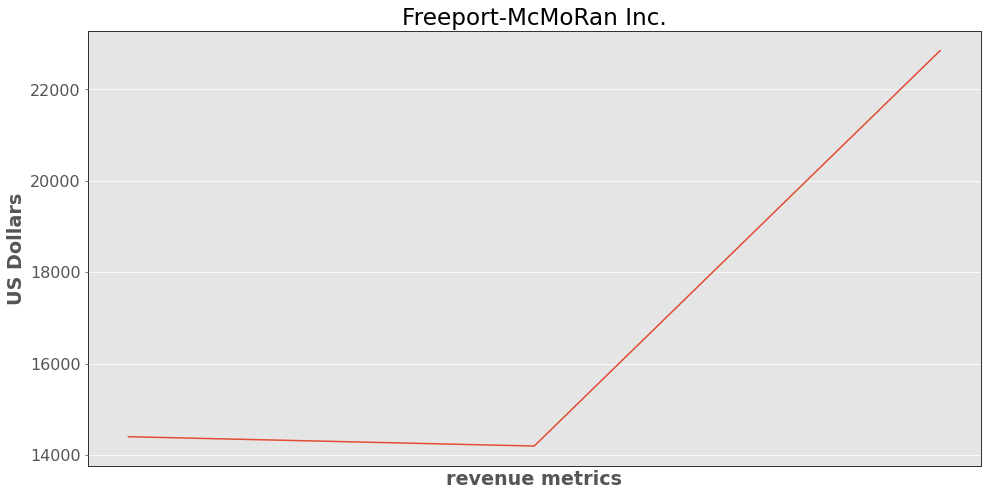

In [55]:
for company in companies_to_plot:
    revenue = universe[universe['companyname']==company][['tctotalrevenue']].copy()

    sf.plot_time(revenue,'tctotalrevenue', (16,8), company, 'revenue metrics','US Dollars')

In [56]:
for company in companies_to_plot:
    revenue = universe[universe['companyname']==company][['tctotalrevenue']]
    print(revenue)

                               tctotalrevenue
year                                         
1970-01-01 00:00:00.000002019       44288.010
1970-01-01 00:00:00.000002020       42931.000
1970-01-01 00:00:00.000002021       61231.000
1970-01-01 00:00:00.000002022       65411.000
                               tctotalrevenue
year                                         
1970-01-01 00:00:00.000002019      215111.000
1970-01-01 00:00:00.000002020      142338.000
1970-01-01 00:00:00.000002021      203751.000
                               tctotalrevenue
year                                         
1970-01-01 00:00:00.000002019       14402.000
1970-01-01 00:00:00.000002020       14198.000
1970-01-01 00:00:00.000002021       22845.000


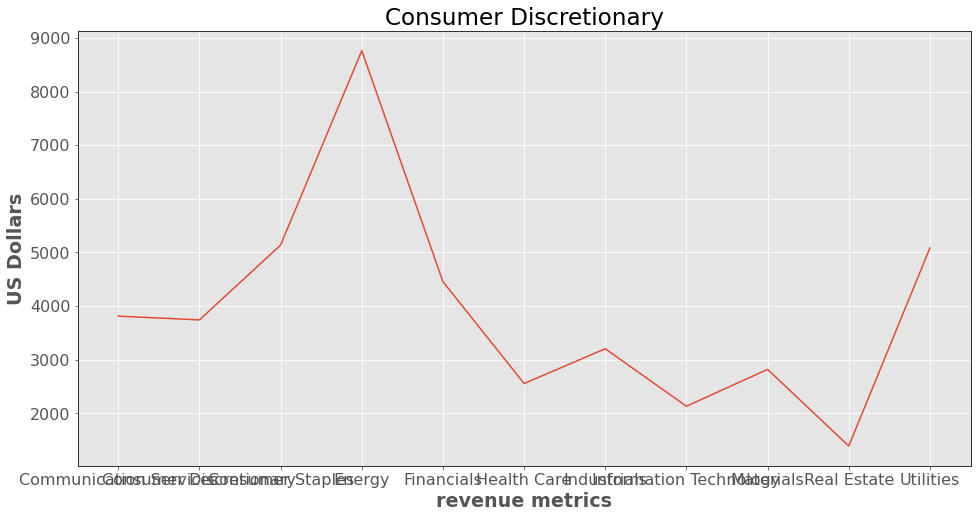

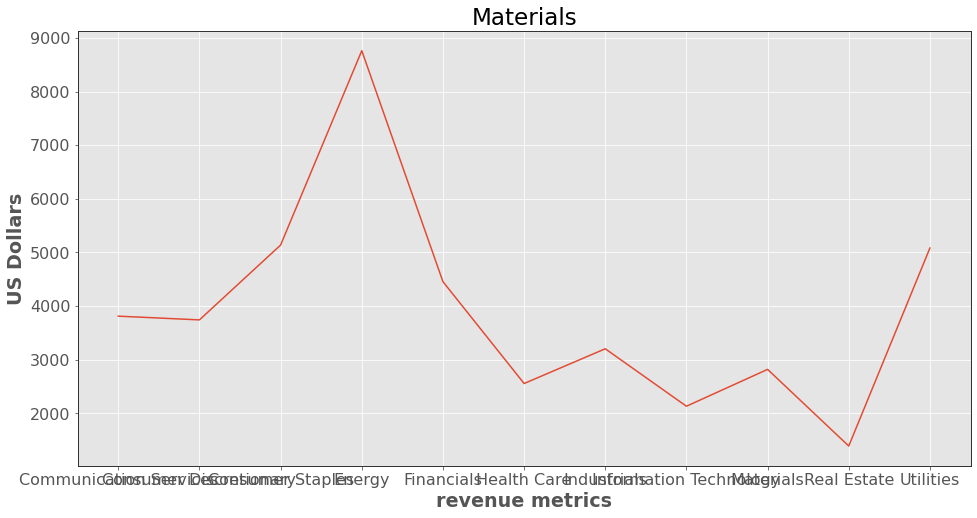

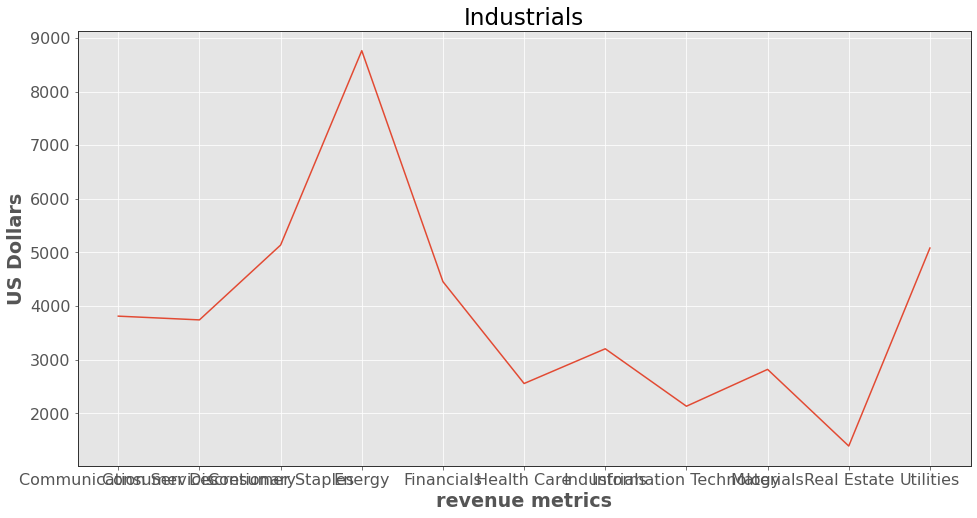

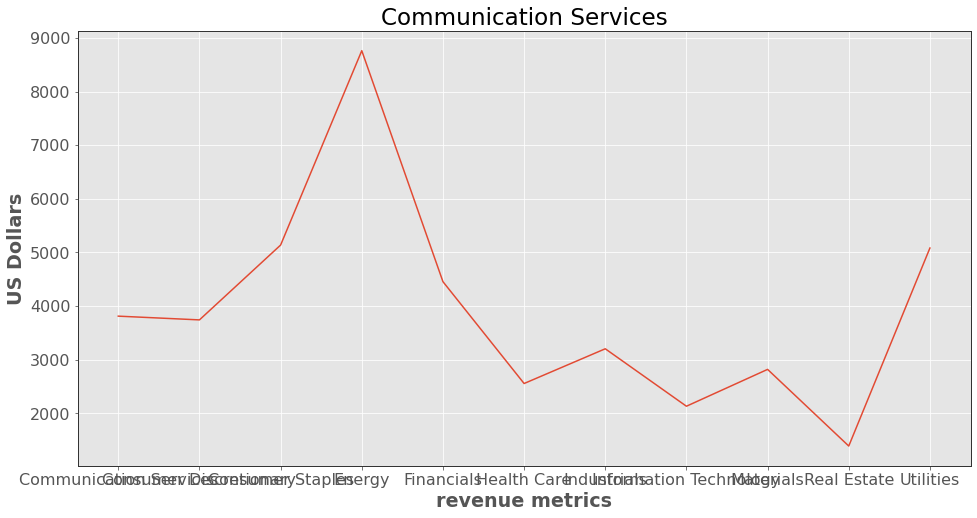

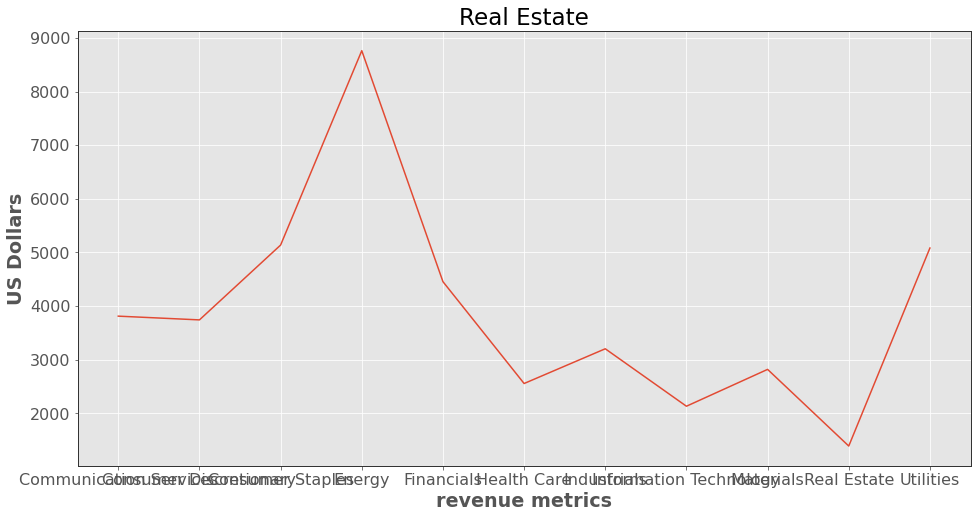

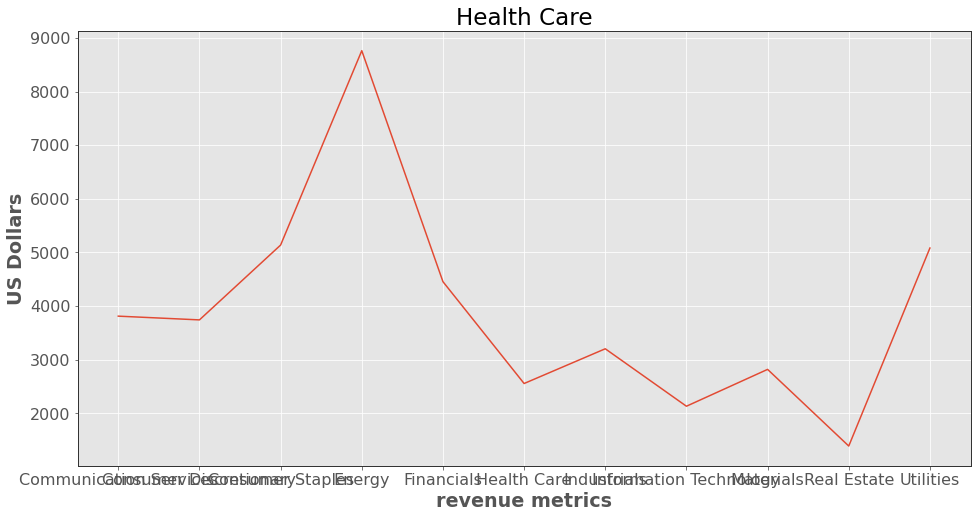

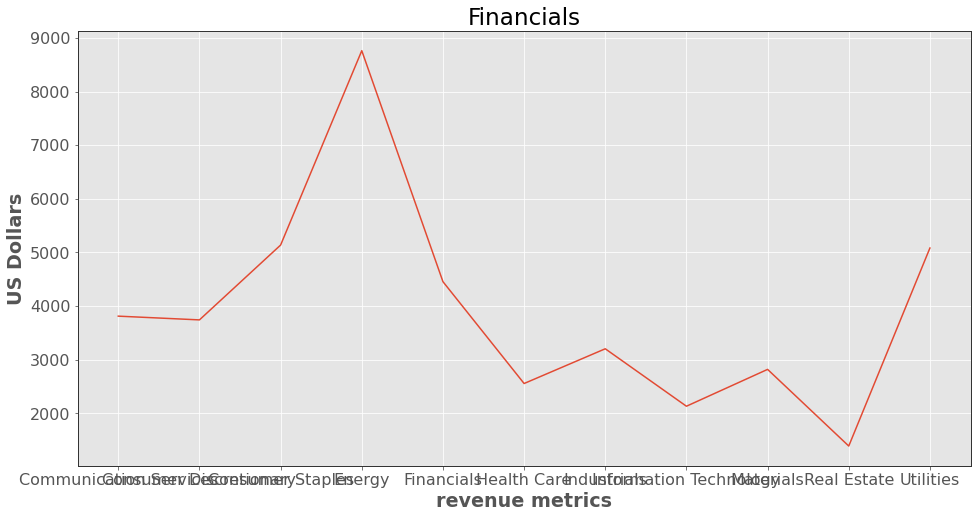

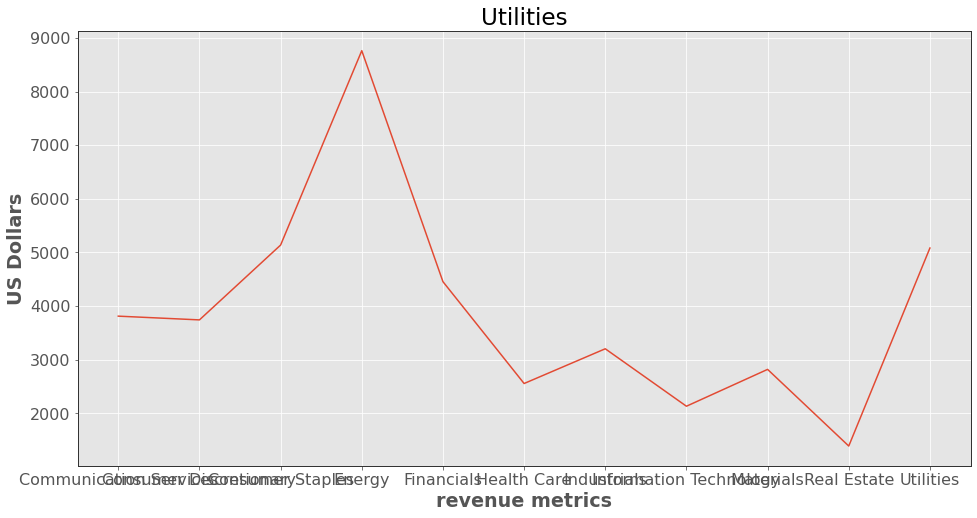

In [57]:
gicsname = [x for x in universe.gicssectorname.unique()]
for gics in gicsname:
    gics_df = universe.groupby('gicssectorname')[['tctotalrevenue']].mean()
    sf.plot_time(gics_df,'tctotalrevenue', (16,8), gics, 'revenue metrics','US Dollars')
    
    

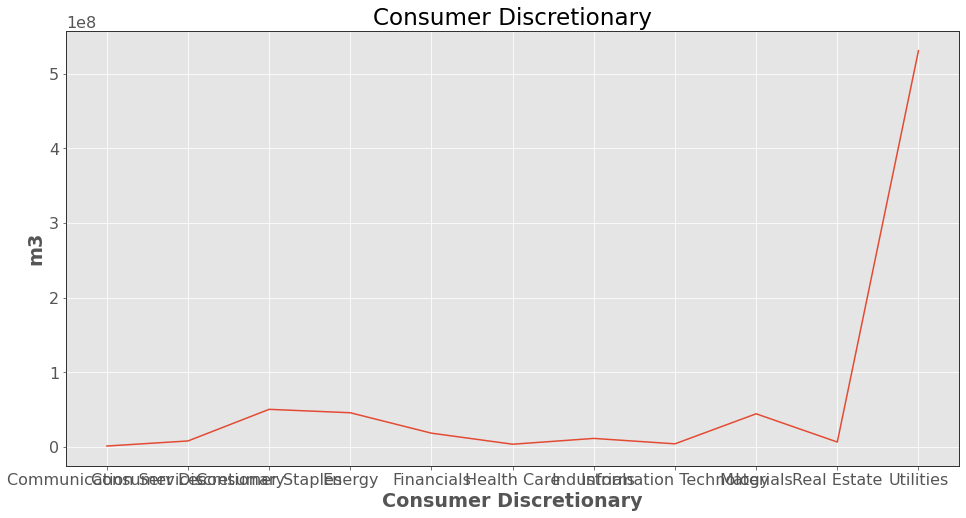

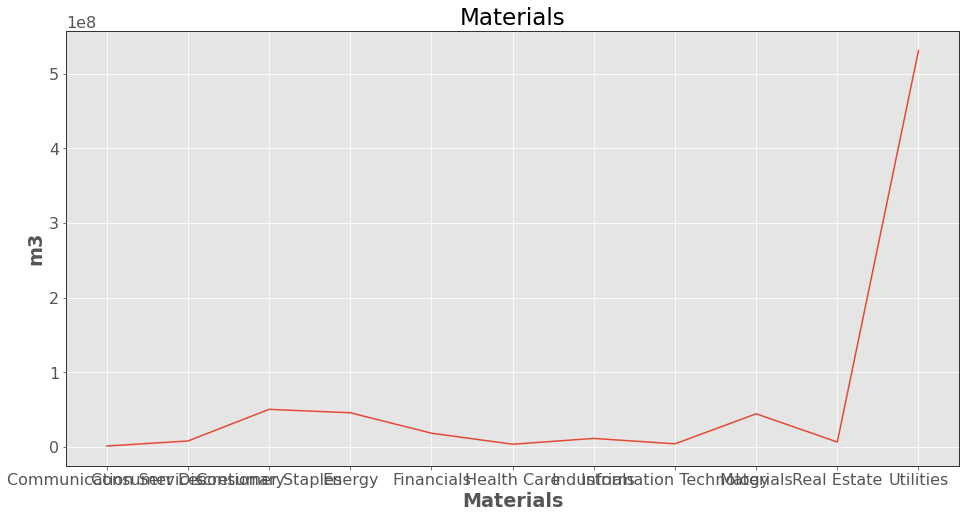

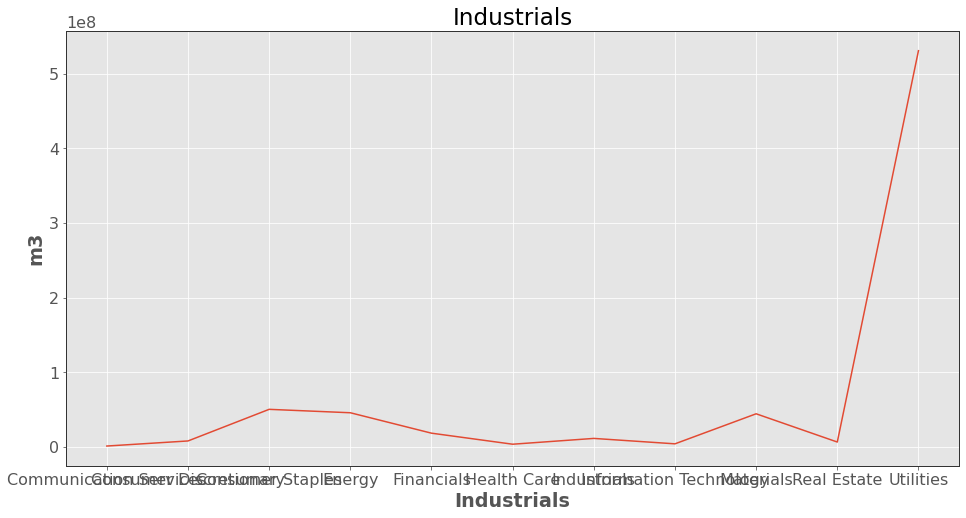

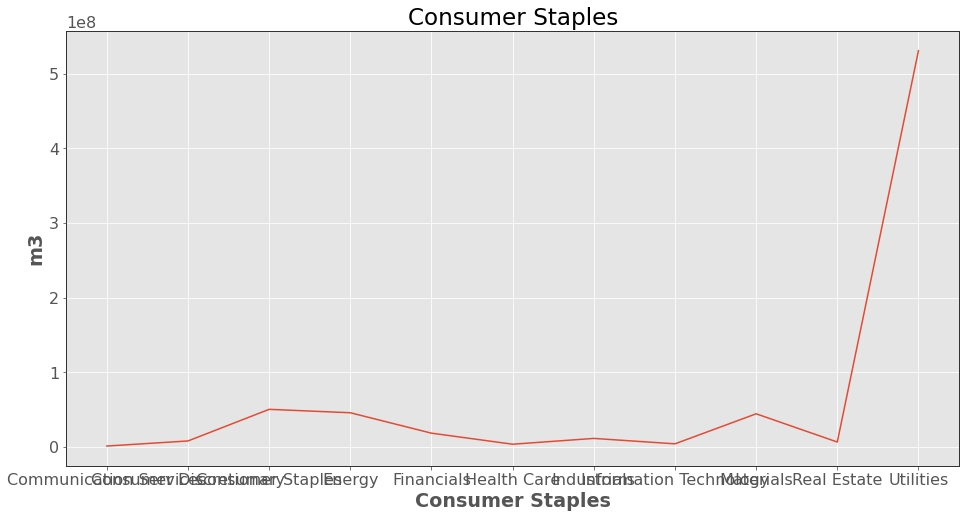

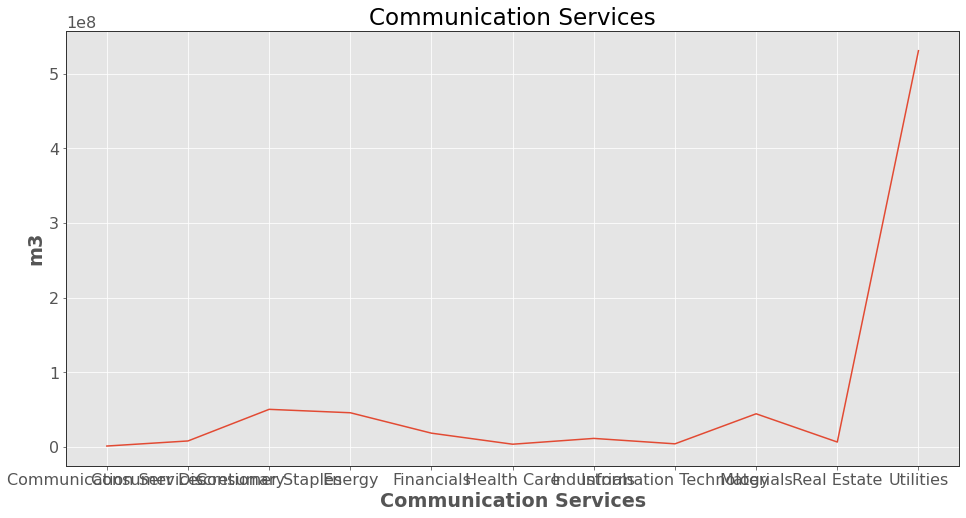

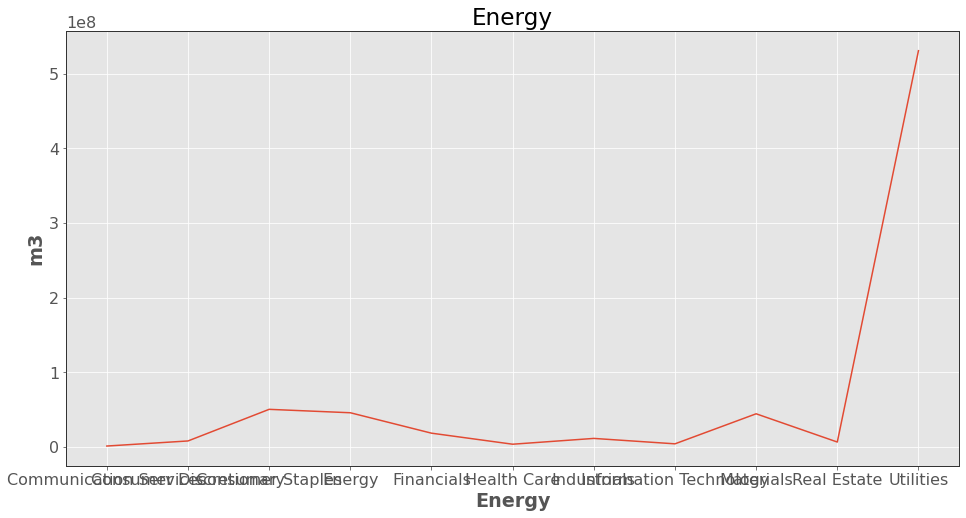

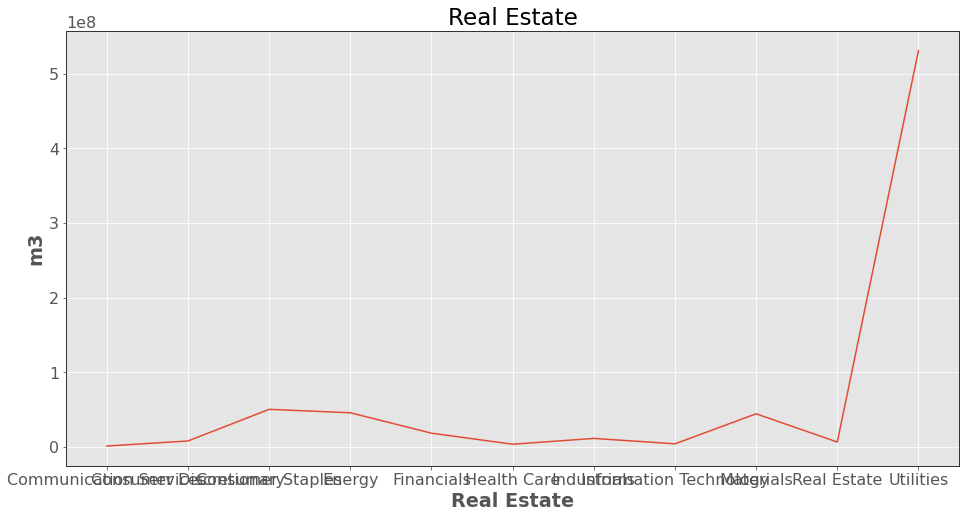

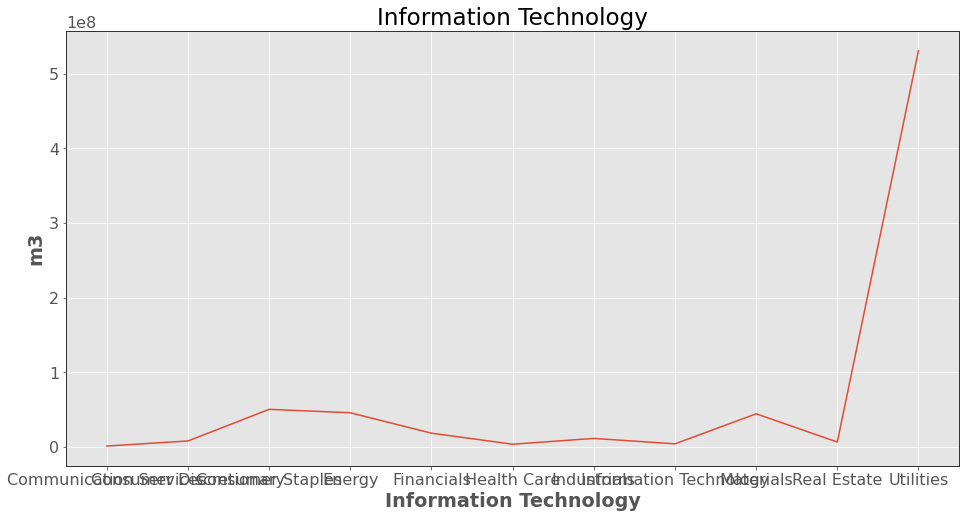

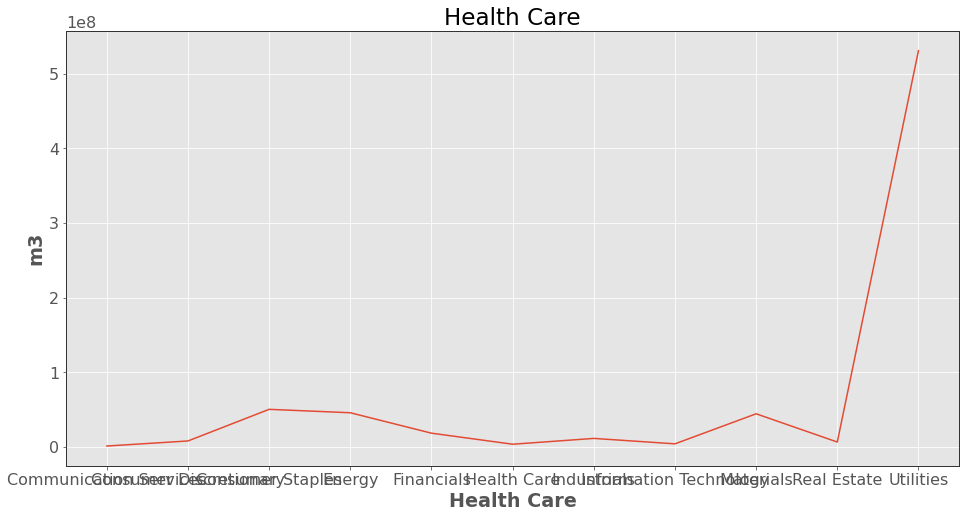

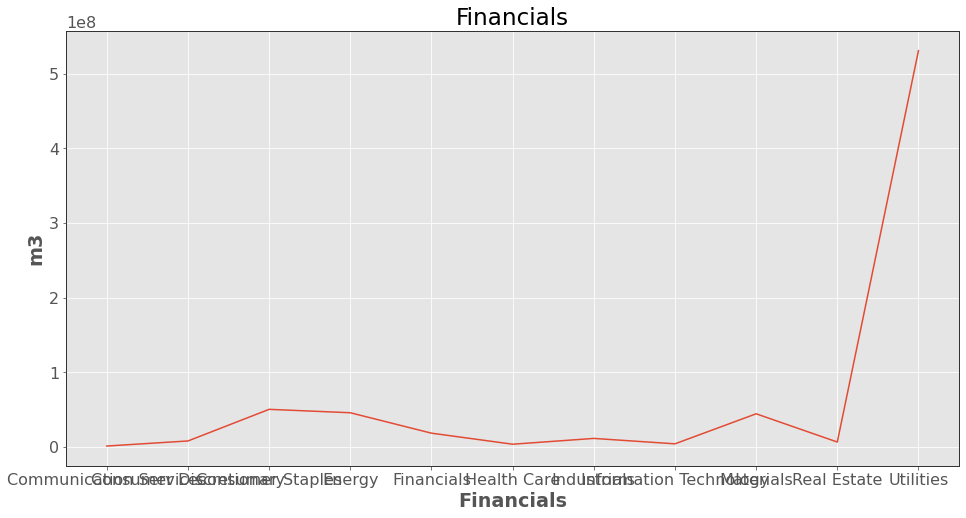

In [58]:
for gics in gicsname:
    gics_df = universe.groupby('gicssectorname')[['tcabswaterdirectprocess']].mean()
    sf.plot_time(gics_df,'tcabswaterdirectprocess', (16,8), gics,gics, 'm3')